# Predictive Maintenance

**Auteurs:** *R. Coenen, Y. Dera, M. Vliex & S. van Wesel* <br>

## Inleiding
Dit onderzoek is uitgevoerd in samenwerking met het lectoraat Data Intelligence van Zuyd Hogeschool. Het lectoraat Data Intelligence bestudeert de mogelijkheden en nieuwste inzichten in de wereld van Data Intelligence. Ze bedenken oplossingen op het gebied van slim omgaan met data met als doelstelling het ontwikkelen en valideren van (datagedreven) innovatieve toepassingen. 

Dit lectoraat doet ook onderzoek naar “Predictive Maintenance”. Kortgezegd wordt bij Predictive Maintenance operationele data van machines geanalyseerd om (mogelijke) toekomstige defecten bij machines te identificeren/voorspellen. Hierdoor is het mogelijk om tijdig onderhoud te laten plaatsvinden en kunnen defecten bij machines voorkomen worden.

Het Data Intelligence Lectoraat heeft aangegeven dat het vertalen van operationele machine data, opgehaald door bijvoorbeeld sensoren, naar een accurate voorspelling over (mogelijke) toekomstige defecten bij machines een lastige kwestie is. De onderzoekers hebben daarom gevraagd om onderzoek te doen naar dit fenomeen.
De opdracht is om op basis van een open dataset , met als onderwerp Predictive Maintenance, een pipeline (een proces van datatransformatie stappen) te creëren waarin de ruwe data van de dataset getransformeerd wordt naar voorspellingen over (mogelijke) toekomstige defecten bij machines.

## Inhoudsopgave

* [1. Project initiatie en Business Understanding](#Chapter1)
* [1.1. Business Understanding](#Chapter1.1)
* [1.2. Doelstelling](#Chapter1.2)
* [1.3. Resultaat](#Chapter1.3)
* [1.4. Onderzoeksvragen](#Chapter1.4)
* [1.5. Hypothesen](#Chapter1.5)
* [1.6. Requirements](#Chapter1.6)
* [1.7. Tools](#Chapter1.7)
* [2. Data mining](#Chapter2)
* [3. Data Preprocessing](#Chapter3)
* [3.1. Data Wrangling](#Chapter3.1)
* [3.1.1. Data Wrangling stap 1](#Chapter3.1.1)
* [3.1.2. Data Wrangling stap 2](#Chapter3.1.2)
* [3.1.3. Data Wrangling stap 3](#Chapter3.1.3)
* [3.1.4. Data Wrangling stap 4](#Chapter3.1.4)
* [3.1.5. Data Wrangling stap 5](#Chapter3.1.5)
* [3.1.6. Data Wrangling stap 6](#Chapter3.1.6)
* [3.1.7. Data Wrangling stap 7](#Chapter3.1.7)
* [3.1.8. Additieve handelingen data wrangling](#Chapter3.1.8)
* [3.1.8.1. Opsplitsen van datetime kolom](#Chapter3.1.8.1)
* [3.1.8.2. Alternatieve code stap 3: One-hot-encoding](#Chapter3.1.8.2)
* [3.1.8.3. Het nivelleren van failures](#Chapter3.1.8.3)
* [3.1.8.4. Het opschalen van failures als tegenhanger van het nivelleren van failures](#Chapter3.1.8.4)
* [3.1.8.5. Op voorhand splitsen algemene testset](#Chapter3.1.8.5)
* [3.1.9. Overzicht dataframes](#Chapter3.1.9)
* [3.2. Data Cleaning](#Chapter3.2)
* [3.2.1. Corrigeren datatypes](#Chapter3.2.1)
* [4. Data Exploration](#Chapter4)
* [4.1. Verwachtingen](#Chapter4.1)
* [4.2. Correlatie Heatmap](#Chapter4.2)
* [4.3. Visuele inzichten](#Chapter4.3)
* [4.3.1. Visuele inzichten failures](#Chapter4.3.1)
* [4.3.2. Visuele inzichten volt](#Chapter4.3.2)
* [4.3.3. Visuele inzichten rotate](#Chapter4.3.3)
* [4.3.4. Visuele inzichten pressure](#Chapter4.3.4)
* [4.3.5. Visuele inzichten vibration](#Chapter4.3.5)
* [4.3.6. Visuele inzichten age](#Chapter4.3.6)
* [4.4. Overweging algoritmen](#Chapter4.4)
* [5. Logistische Regressie](#Chapter5)
* [5.1. Predictive Modeling](#Chapter5.1)
* [5.2. Output en evaluatie](#Chapter5.2)
* [5.3. Conclusie](#Chapter5.3)
* [6. Support Vector Machine](#Chapter6)
* [6.1. Predictive Modeling](#Chapter6.1)
* [6.2. Output en evaluatie](#Chapter6.2)
* [7. Vergelijking Preliminary Modellen](#Chapter7)
* [7.1. Vergelijking Preliminary modellen op basis van model specifieke validatiesets](#Chapter7.1)
* [7.2. Vergelijking Preliminary modellen op basis van generieke dfSmall_oversampled_test set](#Chapter7.2)
* [7.3. Conclusie best presterend Preliminary Model](#Chapter7.3)
* [8. Optimaal trainen logistisch regressie model](#Chapter8)
* [8.1. Predictive Modeling](#Chapter8.1)
* [8.2. Output en evaluatie optimale logistische regressie model](#Chapter8.2)
* [8.3. Output en evaluatie optimale logistische regressie model op basis van dfSmall_oversampled_test](#Chapter8.3)
* [8.4. Conclusie vergelijking preliminary L.R. model en geoptimaliseerd L.R. model](#Chapter8.4)
* [9. Eindconclusie](#Chapter9)
* [10. Discussie](#Chapter9)
* [Verwijzingen](#Verwijzingen)

---

# 1. Project Initiatie en Business Understanding <a class="anchor" id="Chapter1"></a><br>

**Over dit hoofdstuk**
In deze fase is het belangrijk om begrip te krijgen voor de probleemstelling van de klant. Het overzichtelijk in kaart brengen van de wens van de opdrachtgever kan er in resulteren dat de gegevens beter begrepen worden en dat de juisite zinvolle inzichten uit de gegevens afgeleid zullen worden. In deze fase wordt de doelstelling van het project gedefinieerd en wordt omschreven welke voorspellingen uitgewerkt moeten worden. 

## 1.1. Business Understanding <a class="anchor" id="Chapter1.1"></a><br>
De opdrachtgever van dit project heeft aan de projectgroep de opdracht verstrekt om een dataset te zoeken die gebruikt kan worden om voorspellingen te doen inzake het onderhoud van machines, deze methodiek heet predictive maintenance.. Het idee achter predictive maintenance is dat door het monitoren van apparatuur/machines met sensoren de life (of fail) cycle gemanaged kan worden en zo uitval van machines op tijd aangepakt
kan worden; dit is dan ook gelijk de hoofdvraag van dit project. De vertaalslag van sensor data naar een predictie over bijvoorbeeld de resterende levensduur van een apparaat is echter moeilijk en hierbij komen verschillende technieken uit de datascience en machine learning hoek aan te pas. Aan de projectgroep de taak deze vertaalslag te maken en middels verschillende methodieken uit te werken.

Predictive maintenance is een techniek welke gebruik maakt van data analyse tools en technieken om afwijkingen in een organisatie en mogelijke gebreken in apparatuur en processen vroegtijdig te detecteren zodat deze afgehandeld kunnen worden nog vóór dat deze resulteren in een fout [{1}](https://www.fiixsoftware.com/maintenance-strategies/predictive-maintenance/). Enerzijds focust predictive maintenance zich op het voorkomen van reactive maintenance [{2}](https://www.fiixsoftware.com/maintenance-strategies/reactive-maintenance/), waarbij het anderzijds de kosten voor preventive maintenance [{3}](https://www.fiixsoftware.com/maintenance-strategies/preventative-maintenance/) probeert te verlagen.

Ter verduidelijking, er zijn een drietal vormen van predictive maintenance:

<b>Reactive (reactief)</b> - Onderhoud uitvoeren zodra er een probleem is<br>
Probleem: onverwachte storingen kunnen duur (kosten) en potentieel gevaarlijk zijn

<b>Scheduled (gepland)</b> - Onderhoud uitvoeren op basis van een (regelmatig) schema<br>
Probleem: onnodig onderhoud kan verspilling zijn; mogelijk worden niet alle storingen verholpen

<b>Predictive (voorspellend)</b> - Voorspellen wanneer zich problemen zullen voordoen<br>
Probleem: moeilijk om nauwkeurige voorspellingen te doen voor complexe apparatuur

## 1.2. Doelstelling <a class="anchor" id="Chapter1.2"></a><br>
De doelstelling van het project is om op basis van onderzoek een data pipeline te realiseren waarbij ruwe data (omtrent operationele gegevens, onderhoudsgegevens en storingsgegevens van machines) eerst ingeladen en verwerkt wordt en vervolgens door een Machine Learning predictiemodel gebruikt wordt om voorspellingen te maken op het gebied van Predictive Maintenance. Specifiek binnen dit project worden er voorspellingen gemaakt over het wel of niet optreden van Failures (storingen) bij machines.

## 1.3. Resultaat <a class="anchor" id="Chapter1.3"></a><br>
Voor het project is het van belang een resultaat op te leveren. Dit resultaat betreft een gerealiseerde pipeline in de vorm van een Jupyter Notebook waarin van ruwe data naar een predictie model gegaan wordt om failures van machines te kunnen voorspellen. In dit resultaat wordt de pipeline tot stand gebracht door de data te beschrijven, samen te voegen, voor te bewerken, op te schonen en het gereed maken voor het trainen van algoritmen. Vervolgens omvat het resultaat een totaal van 2 uitgewerkte algoritmen waarvan één geoptimaliseerd om voorspellingen te kunnen doen omtrent failures van machines. 

## 1.4. Onderzoeksvragen <a class="anchor" id="Chapter1.4"></a><br>
Voor het onderzoek zijn een aantal onderzoeksvragen opgesteld. Hiervoor luidt de hoofd-onderzoeksvraag: *"Hoe kunnen machine learning algoritmen toegepast worden op een Predictive Maintenance dataset om voorspellingen te maken over (mogelijke) toekomstige defecten bij machines?"*. Hiernaast zijn een tweetal deelvragen opgesteld die beantwoord dienen te worden middels het uitvoeren van het project. Deze deelvragen, samen met de hoofdvraag geven richting aan het project en het bereiken van het doel en de resultaten. 

*Deelvragen:*<br>
- Hoe kan de dataset zodanig geprepareerd worden zodat de voorspellende modellen hiervan gebruik kunnen maken?
- Welke machine learning algoritmen kunnen gebruikt worden voor het voorspellen van (mogelijke) toekomstige defecten bij machines?

## 1.5. Hypothesen <a class="anchor" id="Chapter1.5"></a><br>
Voor het project is het mogelijk verschillende hypothesen op te stellen die bekrachtigt zullen worden of juist verworpen. Door vooraf hypothesen te stellen is het mogelijk het project als hypotheses driven te bestempelen. De onderstaande hypothesen gaan zo in op de operationele prestaties in relatie tot de failures van de machines samen met de leeftijd in relatie tot de failures van machines. Zo wordt er vanuit gegaan dat: 

- De operationele prestaties (telemetrie) van de machines invloed hebben op de failures die bij de machines ontstaan
- De leeftijd van de machines invloed heeft op het optreden van failures

## 1.6. Requirements <a class="anchor" id="Chapter1.6"></a><br>
Gezien het project een data science project betreft kent het een zeer onderzoekende aard. Hierdoor zijn er daarom ook slechts 2 duidelijke requirements gesteld aan het project waaraan voldaan dient te worden. Onderstaande requirements met een omschrijving.

|Requirement|Omschrijving|
|---|---|
|Data pipeline|Een realisatie van een pipeline (met als input een, nog niet voorbewerkte, dataset), die de vertaalslag maakt van ruwe data naar een predictie model dient ontwikkelt te worden|
|DataFrame upscaled|Gedurende het project kwam er naar voor dat het aantal rijen omhoog diende te gaan. Hiermee werd bedoelt het aantal rijen in het gehele dataframe waarop modellen getraind zouden worden en betrof dit een eise die niet direct aan het begin van het project werd gesteld.|

## 1.7. Tools <a class="anchor" id="Chapter1.7"></a><br>
Er zijn diverse tools die ingezet worden bij de realisatie van dit project. Deze worden hieronder in de tabel weergeven, inclusief een (beknopte) omschrijving. Deze modules worden gebruikt met verschillende doelen en zijn van belang goed te installeren/importeren. Wanneer het benodigd is additieve handelingen uit te voeren voor het importeren/installeren van modules wordt dit in de README van het project vermeld. 

|Naam|Soort|Omschrijving|Meer informatie|
|---|---|---|:---:|
|Python| Programmeertaal| Python is een open-source programeertaal welke vaak gebruikt wordt voor machine learning|[python.org](https://www.python.org/)|
|NumPy|Module voor Python| Module voor het omgaan met arrays en matrices met de bijbehorende functies|[numpy.org](https://numpy.org/)|
|Matplotlib|Module voor Python| Module voor grafische toepassingen en visualisaties|[matplotlib.org](https://matplotlib.org/)|
|Seaborn|Module voor Python| Module voor high-level visualisaties|[seaborn.pydata.org](https://seaborn.pydata.org/)|
|Pandas|Module voor Python| Module voor het opslaan en manipuleren van datastructuren|[pandas.pydata.org](https://pandas.pydata.org/)|
|Scikit-learn|Module voor Python| Module voor het toepassen van machine-learningtechnieken|[scikit-learn.org](https://scikit-learn.org/stable/)|
|Anaconda| Module voor Python| Softwaresuite die o.a. Python en diverse (bovengenoemde) libraries, inzake data science, machine learning en data processing, bevat|[anaconda.com/products/individual](https://www.anaconda.com/products/individual)|
|Jupyter Notebook|(Web-based) Tekstverwerker|Online IDE waarmee Jupyter Notebooks (een variant op markdown bestanden) geschreven kunnen worden, in combinatie met Python programmacode| [jupyter.org](https://jupyter.org/)|
|IMBLearn|Module voor Python|Module die gehanteerd wordt voor het kunnen toepassen van het SMOTE algoritme met als doel het opschalen van dataframes|[imbalanced-learn.org](https://imbalanced-learn.org/)| 

# 2. Data Mining <a class="anchor" id="Chapter2"></a><br>
In dit hoofdstuk wordt een dataset met betrekking tot predictive maintenance verkregen. Deze dataset kan afkomstig zijn van verschillende bronnen (relationele en niet-relationele databases) en/of formaten (zoals spreadsheets, CSV, tekstbestanden). Het proces voor het verkrijgen van data, ook wel data mining genoemd, betreft het proces van het verzamelen van gegevens uit mogelijk verschillende bronnen. Hiermee gaat de fase vooraf aan het voorbewerken van de data. Door verschillende stappen uit te voeren wordt een dataset omtrent predictive maintenance verkregen. Zo wordt er in de data mining fase nagedacht over de gegevens die relevant/benodigd zijn voor het project, waar deze te vinden zijn, hoe deze verkregen dienen te worden en waar deze opgeslagen kunnen/dienen te worden om hier vervolgens mee aan de slag te gaan.<br>

**Stap 1: Welke gegevens zijn relevant voor dit project?** <br>
In de opdrachtomschrijving van de opdrachtgever werd er gevraagd naar het voorspellen van onderhoudsmomenten voor machines, op basis van sensoren. Hierdoor zou uitval van de machines vroegtijdig voorkomen kunnen worden en eventueel de resterende levensduur in kaart gebracht worden. In dit geval is de sensordata aanwezig, onderhoudshistorie en informatie inzake failures en errors.

**Stap 2: Waar zijn deze gegevens te vinden?** <br>
De dataset waarmee gewerkt wordt in dit project is te raadplegen op [Kaggle](https://www.kaggle.com/arnabbiswas1/microsoft-azure-predictive-maintenance). Kaggle is een dochteronderneming van [Google](https://www.google.com/) en is een online platform/community, gericht op datawetenschappers en beoefenaars van machine learning. Deze website biedt gebruikers de mogelijkheid om datasets te vinden en te publiceren evenals dat gebruikers de mogelijkheid hebben om direct aan de slag te kunnen gaan met de datasets. 

De 'Microsoft Azure Predictive Maintenance' wordt voor dit project dus gedownload vanaf Kaggle. Deze dataset is echter in het verleden beschikbaar gesteld door [Microsoft](https://www.microsoft.com/) als een project onder de noemer 'Azure AI Notebooks for Predictive Maintenance'. Dit project is echter op 15 oktober 2020 beëindigd{1}. De dataset is via Kaggle wel nog te downloaden.

**Stap 3: Hoe kan deze data verkregen worden?** <br>
Via Kaggle zijn de 5, destijds door Microsoft beschikbaar gestelde, gegevens te vinden. Deze zijn opgeslagen en gepubliceerd in een CSV-formaat (kommagescheiden bestand). Deze dataset bestaat uit 5 delen: errors (1), failures (2), machines (3), maint (4) en telemtry (5). 

**Stap 4: Waar wordt de data opgeslagen (zodat er mee gewerkt kan worden)?** <br>
Er wordt een centrale [GitHub](https://github.com/Intux404/Predictive_Maintenance) omgeving aangemaakt waarbinnen de datasets worden opgeslagen. Deze omgeving biedt ook de mogelijkheid om het onderzoeksrapport te uploaden en de verschillende versies van de verschillende projectleden bij te houden inclusief een versiehistorie en de mogelijkheid om alle nieuwe revisies samen te voegen tot één gezamelijk bestand.

**Stap 5: Een blik werpen op de data** <br>
De dataset bestaat uit de volgende gegevens:
- **Machinecondities en gebruik**: De bedrijfsomstandigheden (de omstandigheden wanneer de machine aan staat) van een machine, b.v. gegevens verzameld van sensoren.
- **Storingshistorie**: De storingshistorie van een machine of onderdeel binnen de machine.
- **Onderhoudshistorie**: De reparatiehistorie van een machine, b.v. foutcodes, eerdere onderhoudsactiviteiten of vervanging van onderdelen.
- **Machinekenmerken**: De kenmerken van een machine, b.v. merk en model, locatie etc.

En bevat de volgende kenmerken:
- **Telemetrie-tijdreeksgegevens (PdM_telemetry.csv)**: het bestaat uit het uurgemiddelde van spanning, rotatie, druk en trillingen verzameld van 100 machines voor het jaar 2015.
- **Fout (PdM_errors.csv)**: Dit zijn fouten die de machines tegenkomen terwijl ze in bedrijf (actief) zijn. Aangezien deze fouten de machines niet afsluiten, worden deze niet als storingen beschouwd. De foutdatum en -tijden worden afgerond op het dichtstbijzijnde uur, aangezien de telemetriegegevens tegen een uurtarief worden verzameld.
- **Onderhoud (PdM_maint.csv)**: Als een onderdeel van een machine wordt vervangen, wordt dat als record vastgelegd in deze tabel. Onderdelen worden vervangen in twee situaties: <br>
1. Tijdens het reguliere geplande bezoek heeft de monteur het vervangen (Proactief Onderhoud) <br> 
2. Een onderdeel gaat kapot en vervolgens voert de monteur een ongepland onderhoud uit om het onderdeel te vervangen (Reactief Onderhoud). Dit wordt beschouwd als een storing en de bijbehorende gegevens worden vastgelegd onder Storingen. Onderhoudsgegevens hebben records voor zowel 2014 als 2015. Deze gegevens worden afgerond op het dichtstbijzijnde uur, aangezien de telemetriegegevens tegen een uurtarief worden verzameld.
- **Storingen (PdM_failures.csv)**: Elk record vertegenwoordigt de vervanging van een onderdeel als gevolg van een storing. Deze gegevens zijn een subset van onderhoudsgegevens. Deze gegevens worden afgerond op het dichtstbijzijnde uur, aangezien de telemetriegegevens tegen een uurtarief worden verzameld.
- **Metadata van machines (PdM_Machines.csv)**: modeltype en leeftijd van de machines.

*Tabel 1: Data Dictionary*

| Feature   | Omschrijving | Voorbeeld data    | Data Type | Type variabele | Meeteenheid | (Oorspronkelijke) databron |
| ----------| -------------| ----------------- | ----------| ---------------| ------------|  --------------------------|
| machineID | Iedere machine wordt gekenmerkt door een uniek identificatienummer | 1 | Int64 | Kwalitatief (discreet) | n.v.t | PdM_machines.csv |
| model     | Er zijn verschillende soorten modellen, die gekenmerkt worden door een modelnummer | model 3 | text | Kwalitatief (discreet) | n.v.t |PdM_machines.csv |
| age       | De leeftijd van de machines/compontenten | 18 | Int64 | Kwantitatief (discreet) | Maanden | PdM_machines.csv |
| datetime  | Geeft de datum en tijd weer | 3-1-2015 07:00:00 | datetime | Kwantitatief (continue) | Uren, minuten, seconde | PdM_errors.csv     |
| errorID   | Iedere error wordt gekenmerkt door een (uniek) error nummer | error1 | text | Kwalitatief (discreet) | n.v.t | PdM_errors.csv     |
| failure   | Geeft aan welk component gefaald is | comp4 | text | Kwalitatief (discreet) | Binair | PdM_failures.csv |
| comp      | Ieder component wordt gekenmerkt door een componentnummer | comp2 | text | Kwalitatief (discreet) | n.v.t | PdM_maint.csv |
| volt      | De elektrische spanning in volt | 176217853015625 | Int64 | Kwantitatief (continue)| voltage ($V$) | PdM_maint.csv |
| rotate    | Aantal rotaties per minuut | 418504078221616   | Int64 | Kwantitatief (continue) | Rotaties per minuut ($RPM$) | PdM_maint.csv  |
| pressure  | Uitgeoefende druk in Kilo pascal (=0,01 bar) | 113077935462083   | Int64 | Kwantitatief (continue) | Kilo Pascal ($kPa$) (1 kPa = 0,01 bar) | PdM_maint.csv  |
| vibration | Periodieke beweging van een voorwerp of medium | 450876857639276 | Int64 | Kwantitatief (continue) | Herz ($Hz$) | PdM_maint.csv |

Onderstaande codeblokken tonen handelingen die zijn uitgevoerd voor het achterhalen van informatie omtrent de data. 

**Inladen datasets en libraries**<br>
De eerste stap die uitgevoerd wordt in code betreft het importeren van libraries samen met het inladen van de brongegevens. Onderstaande codeblokken met commentaar tonen deze handelingen. 

In [115]:
## Het importeren van de benodigde bilbiotheken in een verder stadium van het project.
import numpy as np #Library voor het kunnen werken met matrixen
import pandas as pd #Library voor data frame manipulatie
import matplotlib.pyplot as plt #Library voor het visualiseren van grafieken etc.
import seaborn as sb #Uitbreiding op matplotlib voor het mogelijk mooier maken van visualisaties

from sklearn.utils import resample #Library voor het downsamplen van de dataset (nivelleren failures)
from numpy.polynomial.polynomial import polyfit #Import polyfit module voor Pearson R
from imblearn import under_sampling, over_sampling #Inladen van under en oversampling libraries vanuit imblearn
from imblearn.over_sampling import SMOTE #Library voor het opschalen van dataframes. Om dit te gebruiken dient imblearn geïnstalleerd te zijn:
        # pip install imblearn
        # conda install -c-forge imbalanced-learn
        # https://stackoverflow.com/questions/50376990/modulenotfounderror-no-module-named-imblearn
from sklearn.model_selection import train_test_split #Inladen train_test_split voor het opsplitsen van datasets voor het trainen en evalueren van modellen
from sklearn.metrics import plot_confusion_matrix #inladen confusion matrix voor het evalueren van de getrainde en geteste modellen
from sklearn.linear_model import LogisticRegression #inladen voor het kunnen uitvoeren en gebruiken van de logistic regression functies
from sklearn.preprocessing import scale #inladen voor het mogelijk kunnen maken voor het schalen van data (tussen 0 en 1) wanneer dit nodig blijkt te zijn
from sklearn.svm import SVC #Inladen support Vector Classifier om gebruik te kunnen maken van de support vector machine functies
from sklearn.model_selection import GridSearchCV #inladen gridsearch cv voor het achterhalen van ideale parameters

In [116]:
## Het inladen van de bronbestanden
dfTelemetry = pd.read_csv('data/PdM_telemetry.csv')
dfErrors = pd.read_csv('data/PdM_errors.csv')
dfMaint = pd.read_csv('data/PdM_maint.csv')
dfFailures = pd.read_csv('data/PdM_failures.csv')
dfMachines = pd.read_csv('data/PdM_machines.csv')

In [117]:
##Het tonen van de dataframes (standaard toont de .head functie de eerste 5 rijen van de code) om een korte data exploratie uit te voeren
print(dfTelemetry.head())
print(dfErrors.head())
print(dfMaint.head())
print(dfFailures.head())
print(dfMachines.head())

              datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  
              datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5
3  2015-01-10 15:00:00          1  error4
4  2015-01-22 10:00:00          1  error4
              datetime  machineID   comp
0  2014-06-01 06:00:00          1  comp2
1  2014-07-16 06:00:00          1  comp4
2  2014-07-31 06:00:00          1  comp3
3  2014-12-13 06:00:00          1  comp1
4  2015-01-05 

# 3. Data Preprocessing <a class="anchor" id="Chapter3"></a><br>
Dit hoofdstuk gaat in op het gereed maken en voorbewerken van de dataset. Oorspronkelijk bestaat de dataset uit 5 losse csv bestanden die tot één document samengevoegd dient te worden. Het samenvoegen van het document gebeurd in de paragraaf [Data Wrangling](#Chapter3.1). Vervolgens worden stappen ondernomen om enerzijds vast te stellen of data cleaning benodigd is na het samenvoegen van de data en anderzijds deze zaken op te lossen. Dit is terug te vinden in [paragraaf 3.2.](#Chapter3.2) Zo bestaat dit hoofdstuk uit de twee grote componenten voor het gereedmaken van de data voordat deze verkend kan worden; 
+ *Data Wrangling*: Het samenvoegen van brondata tot één dataframe.
+ *Data Cleaning*: Het identificeren van fouten in de data en deze afhandelen.

## 3.1. Data Wrangling <a class="anchor" id="Chapter3.1"></a><br>
Data wrangling betreft het op elkaar laten passen van de data. Hiermee wordt bedoelt het leggen van [relaties](https://www.techopedia.com/definition/21677/relation#:~:text=In%20relational%20databases%2C%20a%20relationship,key%20of%20the%20other%20table.&text=Relation%2C%20therefore%2C%20is%20the%20defining,also%20be%20known%20as%20relationship.) tussen de tabellen. Het samenvoegen van de bronnen volgt een aantal stappen. Deze worden onderverdeeld in stapnummers en parallel gedocumenteerd en uitgevoerd.  

### 3.1.1. Data Wrangling stap 1 <a class="anchor" id="Chapter3.1.1"></a><br>
De eerste stap voor het op elkaar laten passen is het inzichtelijk maken van het datamodel. Middels gebruik te maken van [Microsoft PowerBI](https://powerbi.microsoft.com/nl-nl/) wordt een model opgesteld waarbij de relaties tussen de tabellen geïdentificeerd kunnen worden. Dit heeft als resultaat het onderstaat Entity Attribute Relation Diagram (EARD):

<img src="img/Oorspronkelijk_dataModel.png" alt="oorspronkelijk datamodel" width="650"/><br>
*Oorspronkelijk datamodel* <br>

Onderstaande tabel omschrijft de relaties tussen de tabellen met een verdere diepgaande omschrijving om extra verheldering te bieden. 

*Relaties in model*
|Tabel 1 (van)|Tabel 2 (naar)|Type relatie|Omschrijving|
|:---:|:---:|---|---|
|PDM_Machines|PDM_Maint|1 op 0 of meer (1...0*)|De relatie tussen de tabellen definieerd dat één machine 0 of meer keer onderhoud zal ondergaan|
|PDM_Machines|PDM_Failures|1 op 0 of meer (1...0*)|De relatie tussen de tabellen definieerd dat één machine 0 of meer failures kan hebben|
|PDM_Machines|PDM_Errors|1 op 0 of meer (1...0*)|De relatie tussen de tabellen definieerd dat één machine 0 of meer errors kan hebben|
|PDM_Machines|PDM_Telemetry|1 op 1 of meer (1...1*)|De relatie tussen de tabellen definieerd dat één machine minstens één keer gemeten is in de operationele staat|

Echter, op basis van diepgaander onderzoek blijkt dat de tabellen anders samengevoegd dienen te worden. Dit komt door een verschillende aantal opvallende zaken waarmee rekening gehouden dient te worden bij het samenvoegen van de bronbestanden. Deze opvallende zaken zijn: 

+ Een Error hoeft niet altijd tot een failure te leiden en dient gezien te worden als een aparte tabel. 
+ De tabellen PDM_Maint en PDM_Failures zijn aan elkaar gelinkt. Een failure leidt namenlijk altijd tot onderhoud. Maar onderhoud wordt niet alleen uitgevoerd door de gevolgen van een failure.

Deze twee zaken dienen in acht genomen te worden bij de volgende stappen, dit zal uiteindelijk ook leiden tot een ander model. 

### 3.1.2. Data Wrangling stap 2 <a class="anchor" id="Chapter3.1.2"></a><br>
Nu bekend is hoe data onderling is gerelateerd aan elkaar, is het van belang op basis van de opvallende zaken het gehele dataframe op te gaan bouwen. Hiervan is de eerste stap direct het afhandelen van de tweede opvallende zaak (relatie tussen failures en maintenance tabel). 

**1.**<br>
De eerste samenvoeging wordt gedaan en krijgt de naam df1. df1 is een left join van de maintenance tabel op de failures tabel. Hierbij worden vanuit de PDM_Maint de kolommen ```datetime```, ```machineID``` en ```comp``` meegenomen. Vanuit de rechter tabel (PDM_failure) worden de kolommen ```datetime```, ```machineID``` en ```failure``` meegenomen. Hierbij is het mogelijk dat comp en failure op elkaar gejoined worden aangezien de inhoud van de rijen hetzelfde is. Een voorbeeld van de inhoud van de [comp] is namenlijk "comp4", deze waarde kan ook terug komen in de kolom failure van PDM_failures. Onderstaande regel toont de code hiervoor. 

```df1 = pd.merge(dfMaint, dfFailures, how='left', left_on=['datetime', 'machineID', 'comp'], right_on = ['datetime', 'machineID', 'failure'])```

**2.**<br>
Nadat de tabellen zijn samengevoegd is het van belang de lege waardes (Nan) in de 'failure' kolom op te vullen met een 0. Dit wordt gedaan om aan te duiden dat wanneer er een 0 staat, er geen failure op heeft getreden. Dit wordt uitgevoerd met de regel: 

```df1['failure'] = df1['failure'].fillna(0)```

**3.**<br>
Vervolgens is het van belang dat wanneer er een failure op heeft getreden (de rijen in de kolom [failure] die een waarde hebben), deze waarde op 1 gezet wordt. Hiermee wordt de kolom [failure] omgezet naar een binaire waarde. Wanneer dit is uitgevoerd indiceert een '1' in de kolom [failure] een failure, en een '0' geen failure. Het corresponderende component wanneer een failure optradt, is te zien in de kolom [comp]. Om dit te verwezenlijken wordt de volgende regel code uitgevoerd: 

```df1.loc[((df1.failure == 'comp1') | (df1.failure == 'comp2') | (df1.failure == 'comp3') | (df1.failure == 'comp4')), 'failure'] = '1'```

**4.**<br>
Vervolgens wordt in een laatste sub-stap een regel code uitgevoerd om de datatype kolom [failure] om te zetten naar een integer datatype. Dit wordt gedaan om er later berekeningen over te kunnen doen. 

```df1['failure'] = df1['failure'].astype(int)```

Alle stappen worden in onderstaande codeblock uitgevoerd. 

In [118]:
# #Left join failures on maintenance to create df1
df1 = pd.merge(dfMaint, dfFailures, how='left', left_on=['datetime', 'machineID', 'comp'], right_on = ['datetime', 'machineID', 'failure'])
df1['failure'] = df1['failure'].fillna(0) #indicates maint was not a failure
df1.loc[((df1.failure == 'comp1') | (df1.failure == 'comp2') | (df1.failure == 'comp3') | (df1.failure == 'comp4')), 'failure'] = '1' #indicates maintenance was a failure
df1['failure'] = df1['failure'].astype(int)

### 3.1.3. Data Wrangling stap 3 <a class="anchor" id="Chapter3.1.3"></a><br>
De volgende stap in het samenvoegen van de dataset betreft het gereed maken van de Error tabel. De Error tabel voegt per error een nieuwe rij toe wat resulteert in redundante data. Een voorbeeld hiervan is bijvoorbeeld:

|datetime|machineID|errorID|
|---|---|---|
|7/18/2020 : 06:00:00|1|error1|
|7/18/2020 : 06:00:00|1|error2|

De twee rijen in de tabel worden redundant gezien op basis van de datetime en machineID. Het kan dus voorkomen dat een machine op één tijdstip meerdere errors krijgt. Om dit af te handelen worden een aantal stappen uitgevoerd. 

**1.** <br>
De eerste stap van het gereed maken van de errors tabel is het toekennen van het oorspronkelijke dataframe aan df2. Hierna worden vijf nieuwe kolommen aangemaakt met de namen *Error1*, *Error2*, *Error3*, *Error4* en *Error5*. De waardes voor deze kolommen worden vervolgens allemaal op *0* gezet. Onderstaande code zorgt ervoor dat dit gerealiseerd wordt: 

```python
df2 = dfErrors
df2['Error1'] = 0
df2['Error2'] = 0
df2['Error3'] = 0
df2['Error4'] = 0
df2['Error5'] = 0
```
**2.** <br>
De volgende stap in het gereedmaken van de error tabel (vanaf nu df2 genoemd) is het lokaliseren van de errorwaardes in de *errorID* kolom. Vervolgens wordt aan de bijpassende kolom waarde *1* toegevoegd. Op deze manier ontstaat een binaire waarde in een kolom. Dit betekent dat de rijen uit het eerdere voorbeeld er als volgt uit komen te zien: 

|datetime|machineID|errorID|Error1|Error2|Error3|Error4|Error5
|---|---|---|---|---|---|---|---|
|7/18/2020 : 06:00:00|1|error1|1|0|0|0|0|
|7/18/2020 : 06:00:00|1|error2|0|1|0|0|0|

Om dit te verwezenlijken wordt het onderstaande stuk code uitgevoerd: 

```python
df2.loc[(df2['errorID'] == 'error1'), 'Error1'] = 1
df2.loc[(df2['errorID'] == 'error2'), 'Error2'] = 1
df2.loc[(df2['errorID'] == 'error3'), 'Error3'] = 1
df2.loc[(df2['errorID'] == 'error4'), 'Error4'] = 1
df2.loc[(df2['errorID'] == 'error5'), 'Error5'] = 1
```

**3.** <br>
De derde stap is het groeperen van de rijen waarin de rijen alsnog dubbel staan. In de voorbeeldtabel is te zien dat de rijen nog steeds dubbel staan. Dit wordt middels een groupby afgehandeld op basis van de *datetime* en *machineID* kolom. Dit zal gebeuren voor iedere Error{n} kolom met een lengte van 5. Hiervoor zal de som opgeteld worden. Dit wordt verwezenlijkt middels onderstaande regel code. 

```python
df2 = df2.groupby(['datetime', 'machineID'])[[f'Error{n}' for n in range (1,6)]].sum() 
```

Alle stappen worden in onderstaand codeblock uitgevoerd. 

In [119]:
#Clean error table to create df2, df2 = cleansed dfErrors tbl. 
df2 = dfErrors
df2['Error1'] = 0
df2['Error2'] = 0
df2['Error3'] = 0
df2['Error4'] = 0
df2['Error5'] = 0

df2.loc[(df2['errorID'] == 'error1'), 'Error1'] = 1
df2.loc[(df2['errorID'] == 'error2'), 'Error2'] = 1
df2.loc[(df2['errorID'] == 'error3'), 'Error3'] = 1
df2.loc[(df2['errorID'] == 'error4'), 'Error4'] = 1
df2.loc[(df2['errorID'] == 'error5'), 'Error5'] = 1

# # df2 = df2.groupby(['machineID', 'datetime']).sum() #Groups on all cols.
df2 = df2.groupby(['datetime', 'machineID'])[[f'Error{n}' for n in range (1,6)]].sum() #Groups errorID cols only

### 3.1.4. Data Wrangling stap 4 <a class="anchor" id="Chapter3.1.4"></a><br>
De vierde stap betreft het samenvoegen van de *telemetry* tabel in *df2* (zojuist gereed gemaakte error tabel) Ook hier worden een aantal onderliggende stappen uitgevoerd om te komen tot *df3*. 

**1.** <br>
De eerste stap betreft het mergen van dfTelemetry met df2 om te komen tot df3. Dit wordt gedaan door een left join van dfTelemetry op df2 te doen. Hierbij worden op de kolommen *machineID* en *datetime* gekoppeld die in beiden voorkomen. Deze join zorgt ervoor dat alle rijen uit de dfTelemetry meegenomen worden en hieraan de df2 rijen en kolommen aan toe worden gevoegd. 

```python
df3 = pd.merge(dfTelemetry, df2, how='left', left_on=['machineID', 'datetime'], right_on=['machineID', 'datetime'])
```

Dit leidt tot de volgende handelingen die gedaan dient te worden. Wanneer nu df3 wordt bekeken ontstaat er namelijk het volgende waarbij alle reeds aangemaakte kolommen (Error1 t/m 5) weer op NaN zijn gezet: 

|datetime|machineID|volt|rotate|pressure|vibration|Error1|Error2|Error3|Error4|Error5|
|---|---|---|---|---|---|---|---|---|---|---|
|2015-01-01 06:00:00|1|176.217853|418.504078|113.077935|45.087686|NaN|NaN|NaN|NaN|NaN|
|2015-01-01 07:00:00|1|162.879223|402.747490|95.460525|43.413973|NaN|NaN|NaN|NaN|NaN|

**2.** <br>
Het afhandelen van de NaN waardes gebeurd in 5 regels code waarbij iedere Error{x} wordt gevuld met een *0*. Dit gebeurd middels onderstaande code:

```python
df3['Error1'] = df3['Error1'].fillna(0)
df3['Error2'] = df3['Error2'].fillna(0)
df3['Error3'] = df3['Error3'].fillna(0)
df3['Error4'] = df3['Error4'].fillna(0)
df3['Error5'] = df3['Error5'].fillna(0)
```

**3.** <br>
De laatste handeling die betreffende df3 gedaan dient te worden is het omzetten van het datatype naar een integer. Momenteel is het een object (string) door het samenvoegen van de dataframes. Middels onderstaande code worden de datatypes (dtypes) voor alle Error{x} kolommen omgezet naar een integer(32)

```python
df3.Error1 = df3.Error1.astype(int)
df3.Error2 = df3.Error2.astype(int)
df3.Error3 = df3.Error3.astype(int)
df3.Error4 = df3.Error4.astype(int)
df3.Error5 = df3.Error5.astype(int)
```

Dit leidt tot een voorbeeldtabel als (waarbij de kolommen Error1, Error2, Error3, Error4 en Error5 het datatype integer(32) hebben gekregen):

|datetime|machineID|volt|rotate|pressure|vibration|Error1|Error2|Error3|Error4|Error5|
|---|---|---|---|---|---|---|---|---|---|---|
|2015-01-01 06:00:00|1|176.217853|418.504078|113.077935|45.087686|1|0|0|0|0|
|2015-01-01 07:00:00|1|162.879223|402.747490|95.460525|43.413973|0|1|0|0|0|

Alle code wordt in onderstaande codeblock uitgevoerd.

In [120]:
##Create df3 by joining dfTelemetry on df2
df3 = pd.merge(dfTelemetry, df2, how='left', left_on=['machineID', 'datetime'], right_on=['machineID', 'datetime'])

df3['Error1'] = df3['Error1'].fillna(0)
df3['Error2'] = df3['Error2'].fillna(0)
df3['Error3'] = df3['Error3'].fillna(0)
df3['Error4'] = df3['Error4'].fillna(0)
df3['Error5'] = df3['Error5'].fillna(0)

df3.Error1 = df3.Error1.astype(int)
df3.Error2 = df3.Error2.astype(int)
df3.Error3 = df3.Error3.astype(int)
df3.Error4 = df3.Error4.astype(int)
df3.Error5 = df3.Error5.astype(int)

### 3.1.5. Data Wrangling stap 5 <a class="anchor" id="Chapter3.1.5"></a><br>
De vijfde stap betreft het samenvoegen van de zojuist aangemaakte df3 op de machines tabel. Dit betreft een relatief gemakkelijke merge die wordt gedaan middels een right join van machines op df3. Hiermee worden alle rijen van de oorspronkelijke dfTelemetry bewaard en worden de kolommen model en age vanuit de tabel machines toegevoegd. Deze join wordt gedaan enkel op de sleutel *machineID* aangezien dit de enige kolom is die beiden dataframes hebben. Onderstaande code voert dit uit gevolgd met het daaronder staande vooebeeld:

```python
df4 = pd.merge(dfMachines, df3, how='right', left_on=['machineID'], right_on=['machineID'])
```


|machineID|model|age|datetime|volt|rotate|pressure|vibration|Error1|Error2|Error3|Error4|Error5|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|1|model3|18|2015-01-01 06:00:00|176.217853|418.504078|113.077935|45.087686|1|0|0|0|0|
|1|model3|18|2015-01-01 07:00:00|162.879223|402.747490|95.460525|43.413973|0|1|0|0|0|

Alle code wordt in onderstaand codeblock uitgevoerd.

In [121]:
## Create df4 by joining machines on df3
df4 = pd.merge(dfMachines, df3, how='right', left_on=['machineID'], right_on=['machineID'])

### 3.1.6. Data Wrangling stap 6 <a class="anchor" id="Chapter3.1.6"></a><br>
De zesde stap is het aanmaken van de volledige dataset. Op dit punt zijn de drie linkse tabellen samengevoegd tot df4 en de twee rechtse tabellen tot df1. df5 wordt de samenvoeging van deze twee dataframes waarbij een right join van df1 op df4 wordt gedaan op basis van de kolommen *machineID* en *datetime*. Hiermee worden alle oorspronkelijke rijen van de oude dataset dfTelemetry bewaard (zie code). 

```python
df5 = pd.merge(df1, df4, how='right', left_on=['machineID', 'datetime'], right_on=['machineID', 'datetime'])
```

Echter is het mogelijk dat hier problemen ontstaan doordat er veel lege waardes in de *comp* en *failure* kolom ontstaan, dit is terug te zien in het onderstaande voorbeeld: 

|datetime|machineID|comp|failure|model|age|volt|rotate|pressure|vibration|Error1|Error2|Error3|Error4|Error5|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|2015-01-01 06:00:00|1|comp4|1|model3|18|179.303153|499.777962|111.833028|52.383097|0|0|0|0|0|
|2015-01-01 07:00:00|1|comp1|0|model3|18|179.303153|499.777962|111.833028|52.383097|0|0|0|0|0|
|2016-01-01 02:00:00|100|NaN|NaN|model4|5|179.438162|395.222827|102.290715|50.771941|0|0|0|0|0|
|2016-01-01 07:00:00|100|NaN|NaN|model4|5|189.617555|446.207972|98.180607|35.123072|0|0|0|0|0|

Om problemen te voorkomen wordt een alternatieve dataset opgebouwd die is gefocust op een kleinere dataframe. Dit wordt in de volgende stap afgehandeld.

Alle code wordt in onderstaand codeblock uitgevoerd. 

In [122]:
## Create df5 by joining df1 on df4
df5 = pd.merge(df1, df4, how='right', left_on=['machineID', 'datetime'], right_on=['machineID', 'datetime'])
df = df5

### 3.1.7. Data Wrangling stap 7 <a class="anchor" id="Chapter3.1.7"></a><br>
Om het zojuist opgedane "probleem" te verhelpen, wordt een kleinere dataframe opgebouwd op dezelfde wijze als df5 is ontwikkeld. Echter wordt er nu gebruik gemaakt van een inner join zodat er geen lege waardes in kolommen zullen voorkomen. Dit resulteert tevens in een kleinere dataset met slechts(!) 2886 rijen. Deze zogenoemende dfSmall dataframe wordt uitgevoerd middels de regel code: 

```python
dfSmall = pd.merge(df1, df4)
```

Hiermee ontstaat het volgende: 

|datetime|machineID|comp|failure|model|age|volt|rotate|pressure|vibration|Error1|Error2|Error3|Error4|Error5|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|2015-01-01 06:00:00|1|comp4|1|model3|18|179.303153|499.777962|111.833028|52.383097|0|0|0|0|0|
|2015-01-01 07:00:00|1|comp1|0|model3|18|179.303153|499.777962|111.833028|52.383097|0|0|0|0|0|
|2015-12-09 06:00:00|100|comp2|1|model4|5|144.720190|377.188361|109.995936|28.433400|0|0|0|0|0|
|2015-12-24 06:00:00|100|comp2|0|model4|5|154.408466|535.776651|102.614263|30.723456|0|0|0|0|0|

alle code wordt in onderstaand codeblock uitgevoerd.

In [123]:
#Create dfSmall by inner joining df1 on df4
dfSmall = pd.merge(df1, df4)

### 3.1.8. Additieve handelingen data wrangling<a class="anchor" id="Chapter3.1.8"></a><br>
Op dit punt van het wrangling proces bestaan er zo twee dataframes, df en een kleinere versie hiervan, dfSmall. Hierover werden in een later stadium van het onderzoek additieve handelingen uitgevoerd die te maken hadden met het aanpassen van de oorspronkelijke dataframes. Vanaf deze paragraaf wordt er dieper in gegaan op deze handelingen en wordt bestaande code niet verder aangepast om verwarring en fouten in de code te voorkomen. De additieve handelingen worden voor zowel df als dfSmall uitgevoerd waar relevant.  

#### 3.1.8.1. Opsplitsen van datetime kolom<a class="anchor" id="Chapter3.1.8.1"></a><br>
Vanuit het oogpunt hoe schoon de data is, werd besloten de datetime kolom op te splitsen in een kolom ```date``` en ```timestamp```. Hiermee werd de kolom datetime minder overzichtelijk en maakte het dit mogelijk deze datatypes van de kolommen apart te behandelen. Dit was mogelijk in de toekomst van belang bij het trainen van modellen. Onderstaande twee code blokken voeren de handelingen voor dfSmall en df uit. 

In [124]:
## --------Aanmaken date en timestamp kolom dfSmall--------------------
##if statement om errors te voorkomen wanneer de code meerdere malen wordt uitgevoerd
if 'datetime' in dfSmall:
    ##Het aanmaken van de date en timestamp kolom met een spatie als delimiter
    dfSmall[['date', 'timestamp']] = dfSmall['datetime'].str.split(' ',expand=True)
    ##Het verwijderen van de oorspronkelijke datetime kolom
    dfSmall.drop('datetime', axis=1, inplace=True)
    ##Correct zetten van de volgorde (index) van de kolommen
    col_names = ['date', 'timestamp', 'machineID', 'comp', 'failure', 'model', 'age', 'volt', 'rotate', 'pressure', 'vibration', 'Error1', 'Error2', 'Error3', 'Error4', 'Error5']
    dfSmall = dfSmall.reindex(columns=col_names)
else:
    dfSmall = dfSmall

dfSmall.head()

,date,timestamp,machineID,comp,failure,model,age,volt,rotate,pressure,vibration,Error1,Error2,Error3,Error4,Error5
0,2015-01-05,06:00:00,1,comp4,1,model3,18,179.303153,499.777962,111.833028,52.383097,0,0,0,0,0
1,2015-01-05,06:00:00,1,comp1,0,model3,18,179.303153,499.777962,111.833028,52.383097,0,0,0,0,0
2,2015-01-20,06:00:00,1,comp3,0,model3,18,157.774510,442.816748,105.160692,42.135127,0,0,0,0,0
3,2015-01-20,06:00:00,1,comp1,0,model3,18,157.774510,442.816748,105.160692,42.135127,0,0,0,0,0
4,2015-02-04,06:00:00,1,comp4,0,model3,18,198.120032,438.210053,89.040265,41.887215,0,0,0,0,0


In [125]:
## --------Aanmaken date en timestamp kolom df--------------------
##if statement om errors te voorkomen wanneer de code meerdere malen wordt uitgevoerd
if 'datetime' in df:
    ##Het aanmaken van de date en timestamp kolom met een spatie als delimiter
    df[['date', 'timestamp']] = df['datetime'].str.split(' ',expand=True)
    ##Het verwijderen van de oorspronkelijke datetime kolom
    df.drop('datetime', axis=1, inplace=True)
    ##Correct zetten van de volgorde (index) van de kolommen
    col_names = ['date', 'timestamp', 'machineID', 'comp', 'failure', 'model', 'age', 'volt', 'rotate', 'pressure', 'vibration', 'Error1', 'Error2', 'Error3', 'Error4', 'Error5']
    df = df.reindex(columns=col_names)
else:
    df = df

#### 3.1.8.2 Alternatieve code stap 3: One-hot-encoding<a class="anchor" id="Chapter3.1.8.2"></a><br>
In een later stadium van het project kwam aan het licht dat de stappen die zijn ondernomen in stap 3, one-hot-encoding worden genoemd. One-hot-encoding is het proces voor het opstellen van kolommen die gebaseerd zijn op categorieën. Hierbij worden de kolommen met meerdere waardes (bijvoorbeeld model1, model2, model3, model4) opgesplitst in 4 kolommen en een *0* en *1* ingevuld. Aangezien op dit punt de code al staat waarbij de errors al zijn gecodeerd, is het van belang dit ook nog voor comp en model gedaan dient te worden. Deze laatste stappen gelden als aanvulling en zijn leidend voor de rest van het project. Onderstaande code zorgt ervoor dat de kolommen comp en model worden herzien middels one-hot-encoding. Dit was zoals vermeld al reeds gedaan voor errorID maar op een andere wijze. Hierbij wordt eerst dfsmall voorzien van one-hot-encoding en vervolgens de gehele df.

In [126]:
## --------one-hot-encoding dfSmall--------------------
##One-hot-encoding voor comp en model
##If-statement voor het voorkomen van errors bij meerdere keren uitvoeren
if 'comp' and 'model' in dfSmall:
    ##Het aanmaken van dummies voor one hot encoding voor dfSmall
    dfSmall_encoded = pd.get_dummies(dfSmall, columns=['comp', 'model'])
    ##Het hernoemen van de kolommen
    dfSmall_encoded.rename(columns={
                            'comp_comp1': 'comp_1', 'comp_comp2': 'comp_2', 'comp_comp3': 'comp_3', 'comp_comp4': 'comp_4',
                            'model_model1': 'model_1', 'model_model2': 'model_2', 'model_model3': 'model_3', 'model_model4': 'model_4'},
                            inplace=True)
##Else-statement als de code als een eerder is uitgevoerd
else: 
    dfSmall_encoded = dfSmall

dfSmall_encoded.head()

,date,timestamp,machineID,failure,age,volt,rotate,pressure,vibration,Error1,...,Error4,Error5,comp_1,comp_2,comp_3,comp_4,model_1,model_2,model_3,model_4
0,2015-01-05,06:00:00,1,1,18,179.303153,499.777962,111.833028,52.383097,0,...,0,0,0,0,0,1,0,0,1,0
1,2015-01-05,06:00:00,1,0,18,179.303153,499.777962,111.833028,52.383097,0,...,0,0,1,0,0,0,0,0,1,0
2,2015-01-20,06:00:00,1,0,18,157.774510,442.816748,105.160692,42.135127,0,...,0,0,0,0,1,0,0,0,1,0
3,2015-01-20,06:00:00,1,0,18,157.774510,442.816748,105.160692,42.135127,0,...,0,0,1,0,0,0,0,0,1,0
4,2015-02-04,06:00:00,1,0,18,198.120032,438.210053,89.040265,41.887215,0,...,0,0,0,0,0,1,0,0,1,0


In [127]:
# # --------one-hot-encoding df--------------------
##One-hot-encoding voor comp en model
##If-statement voor het voorkomen van errors bij meerdere keren uitvoeren
if 'comp' and 'model' in df:
    ##Het aanmaken van dummies voor one hot encoding voor dfSmall
    df_encoded = pd.get_dummies(df, columns=['comp', 'model'])
    ##Het hernoemen van de kolommen
    df_encoded.rename(columns={
                            'comp_comp1': 'comp_1', 'comp_comp2': 'comp_2', 'comp_comp3': 'comp_3', 'comp_comp4': 'comp_4',
                            'model_model1': 'model_1', 'model_model2': 'model_2', 'model_model3': 'model_3', 'model_model4': 'model_4'},
                            inplace=True)
##Else-statement als de code als een eerder is uitgevoerd
else: 
    df_encoded = df

df_encoded.head()

,date,timestamp,machineID,failure,age,volt,rotate,pressure,vibration,Error1,...,Error4,Error5,comp_1,comp_2,comp_3,comp_4,model_1,model_2,model_3,model_4
0,2015-01-01,06:00:00,1,NaN,18,176.217853,418.504078,113.077935,45.087686,0,...,0,0,0,0,0,0,0,0,1,0
1,2015-01-01,07:00:00,1,NaN,18,162.879223,402.747490,95.460525,43.413973,0,...,0,0,0,0,0,0,0,0,1,0
2,2015-01-01,08:00:00,1,NaN,18,170.989902,527.349825,75.237905,34.178847,0,...,0,0,0,0,0,0,0,0,1,0
3,2015-01-01,09:00:00,1,NaN,18,162.462833,346.149335,109.248561,41.122144,0,...,0,0,0,0,0,0,0,0,1,0
4,2015-01-01,10:00:00,1,NaN,18,157.610021,435.376873,111.886648,25.990511,0,...,0,0,0,0,0,0,0,0,1,0


#### 3.1.8.3 Het nivelleren van failures<a class="anchor" id="Chapter3.1.8.3"></a><br>
Middels een code uit te voeren (```dfSmall_encoded['failure'].values_count()``` en ```df_encoded['failure'].values_count()```) werd gedurende het onderzoek geconstateerd dat het aantal non-failures groter is dan de failures. Dit zou mogelijk problemen opleveren wanneer modellen getraind zouden worden. Hiermee ontstond namelijk de kans dat modellen bevooroordeeld getraind werden doordat de modellen er sneller vanuit zouden gaan dat er geen failure op zou treden (doordat deze vele malen meer voorkomt dan non-failures). Door het uitvoeren van de code kwam in beiden gevallen naar voor dat er een totaal van *2143* non-failures (niet gefaalde machines) en slechts *743* failures (gefaalde machines) zijn gemeten. Dit betekent dat er een totaal van *1400* meer non-failures voorkomen in de datasets. 

In [128]:
print('Verhouding non-failures en failures in dfSmall_encoded: \n', dfSmall_encoded['failure'].value_counts(), '\n')
print('Verhouding non-failures en failures in df_encoded: \n', df_encoded['failure'].value_counts())

Verhouding non-failures en failures in dfSmall_encoded: 
 0    2143
1     743
Name: failure, dtype: int64 

Verhouding non-failures en failures in df_encoded: 
 0.0    2143
1.0     743
Name: failure, dtype: int64


Het afhandelen van dit fenomeen kan gedaan worden door de dataframes te downsampelen. Echter betekent dit dat voor de gehele df er relatief tot de oorspronkelijke hoeveelheid data gezien zeer weinig rijen overblijven. Wanneer dit voor de grote df gedaan zal worden, betekent dit dat df en dfsmall gelijk aan elkaar zouden worden. Hierom werd er gekozen het nivelleren van de aantal failures alleen voor de dfSmall uit te voeren. Het nivelleren gebeurd zodanig dat beide waardes slechts 743 keer voorkomen in de kolom failure. Onderstaande codeblok nivelleert het aantal failures in de dfSmall dataframe.

In [129]:
## --------Nivelleren van failures 0 en 1 in dfSmall--------------------
##Het opslaan van de failures en non-failures in aparte variabelen
dfSmall_failure = dfSmall_encoded[dfSmall_encoded['failure'] == 1]
dfSmall_no_failure = dfSmall_encoded[dfSmall_encoded['failure'] == 0]

##Het downsampelen van de failures
dfSmall_failure_downsampled = resample(
                        dfSmall_failure,
                        replace=False,
                        n_samples=743,
                        random_state=42)

##Het downsampelen van de non-failures
dfSmall_no_failure_downsampled = resample(
                        dfSmall_no_failure,
                        replace=False,
                        n_samples=743,
                        random_state=42)

#Het samenvoegen van de twee variabelen
dfSmall_encoded_leveled_failures = pd.concat([dfSmall_failure_downsampled, dfSmall_no_failure_downsampled])

Wanneer bovenstaande code wordt uitgevoerd ontstaat er een nieuw dataframe genaamd *dfSmall_encoded_leveled_failures* met een totaal aantal failures *743* en non failures *743*. Dit is op te vragen door de regel code ```dfSmall_encoded_leveled_failures['failure'].value_counts()``` in onderstaande codeblok uit te voeren.

In [130]:
##Validatie voor genivelleerde failures
dfSmall_encoded_leveled_failures['failure'].value_counts()

1    743
0    743
Name: failure, dtype: int64

#### 3.1.8.4 Het opschalen van failures als tegenhanger van het nivelleren van failures<a class="anchor" id="Chapter3.1.8.4"></a><br>
Als tegenhanger van het nivelleren van de failures in het dataframe is het tevens mogelijk de minority groep op te schalen. Dit wordt gedaan middels de [Synthethic Minority Oversampling Technique (SMOTE)](https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5). Hierbij wordt een nearest neighbour algoritme toegepast om synthetische data te ontwikkelen en zo invulling te geven aan de mindere groep (minority) wat in dit geval de failures betreffen. Hiermee ontstaat een grotere dataset waarbij fictieve data wordt gegenereerd op synthetische wijze. SMOTE is één van de vele methodieken om slecht gebalanceerde klassen in datasets af te handelen. [Deze website](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/) toont een overzicht van de technieken. Hierbij werd echter voor SMOTE gekozen gezien dit synthetische data betreft die tot stand komt op een gefundeerde manier. Het algoritme zorgt er namenlijk niet voor dat er redundantie in de dataset ontstaat. 

Het opschalen van de failures wordt gedaan voor de dataframe *dfSmall_encoded* en zal een nieuw dataframe tot stand brengen. Dit dataframe dient uiteindelijk als tegenhanger van de dfSmall_encoded_leveled_failures gebruikt te worden.

**Stap 1: In kaart brengen ongelijkheid**<br>
De eerste stap voor het opschalen van de failures is het daadwerkelijk in kaart brengen van de verdeling van failures en non-failures. Onderstaande codeblok toont de verdeling voor de dataframe waarbij een barchart wordt gebruikt voor het weergeven van de verdeling in failures en non-failures. Vervolgens is er een scatterplot ontwikkelt dat laat zien hoe de verdeling van failures en non-failures ligt waarbij de pressure en age van de machines op de x- en y as worden gezet. De regel code die gewenst wordt te gebruiken dient als enige niet uit gecomment te worden samen met de regel ```df_example = dfSmall_encoded[['pressure', 'age', 'failure']]``` 

D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    2143
1     743
Name: failure, dtype: int64

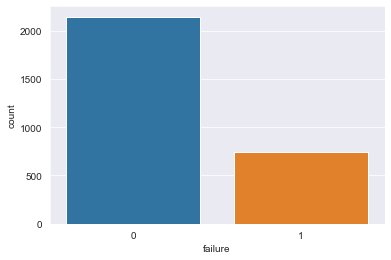

In [131]:
df_exampleUpscale1 = dfSmall_encoded[['pressure', 'age', 'failure']]

##Barchart om de verdeling van failures & non-failures in kaart te brengen, comment onderstaande regel code wanneer de scatterplot wordt gebruikt
sb.countplot(df_exampleUpscale1['failure'])

##Scatterplot om de verdeling van failures & non-failures in kaart te brengen, comment onderstaande regel code wanneer de barchart wordt gebruikt
# sb.scatterplot(data = df_exampleUpscale1, x='pressure', y='age', hue='failure')

##Het tellen van de unieke waardes voor failures en non-failures in het dataframe waarbij 0: non-failure, 1: failure
df_exampleUpscale1['failure'].value_counts()

**Stap 2: Het oversampelen van de data**<br>


In [132]:
##Het over sampelen van de data
smote=SMOTE(random_state=101)
##Het definiëren van X en y waarden die oversampled dienen te worden. X betreffen alle kolommen behalve failure, y betreft de failure kolom.
XtoOver, ytoOver = smote.fit_resample(dfSmall_encoded[['machineID', 'age', 'volt', 'rotate', 'pressure', 'vibration',
                                           'Error1', 'Error2', 'Error3', 'Error4', 'Error5',
                                           'comp_1', 'comp_2', 'comp_3', 'comp_4',
                                           'model_1', 'model_2', 'model_3', 'model_4'
                                           ]],
                          dfSmall_encoded['failure'])

##Aanmaken nieuw dataframe waarbij failures zijn oversampled op basis van SMOTE. Hierbij worden datetime en timestamp weggelaten aangezien deze datatypen niet worden geaccepteerd door SMOTE
dfSmall_oversampled = pd.DataFrame(XtoOver, columns=['machineID', 'age', 'volt', 'rotate', 'pressure', 'vibration',
                                           'Error1', 'Error2', 'Error3', 'Error4', 'Error5',
                                           'comp_1', 'comp_2', 'comp_3', 'comp_4',
                                           'model_1', 'model_2', 'model_3', 'model_4'
                                           ])
dfSmall_oversampled['failure'] = ytoOver
dfSmall_oversampled

,machineID,age,volt,rotate,pressure,vibration,Error1,Error2,Error3,Error4,Error5,comp_1,comp_2,comp_3,comp_4,model_1,model_2,model_3,model_4,failure
0,1,18,179.303153,499.777962,111.833028,52.383097,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,1,18,179.303153,499.777962,111.833028,52.383097,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,18,157.774510,442.816748,105.160692,42.135127,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1,18,157.774510,442.816748,105.160692,42.135127,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,18,198.120032,438.210053,89.040265,41.887215,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,93,17,173.086652,420.357122,115.940914,46.749376,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4282,56,16,146.055292,366.678683,95.183483,44.141858,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4283,50,18,186.339899,442.686800,97.951232,51.316136,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4284,97,11,183.812900,375.312529,122.492666,42.071005,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Stap 3: Het valideren van het nieuwe dataframe**<br>
Nu het dataframe is opgeschaald kan deze vergeleken worden met de voorgaande evaluatie waar df_example werd aangemaakt. Door op dezelfde wijze de data in kaart te brengen wordt nu inzichtelijk gemaakt dat het aantal failures is opgeschaald naar hetzelfde aantal non-failures dat er bestond. Zo onstaan er een totaal van 2143 failures en 2143 non-failures in het nieuwe dataframe. Onderstaande codeblok toont verschillende regels code die afzonderlijk van elkaar uitgevoerd kunnen worden om te valideren dat het nieuwe dataframe df_oversampled beschikt over evenveel failures als non-failures. 

D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    2143
0    2143
Name: failure, dtype: int64

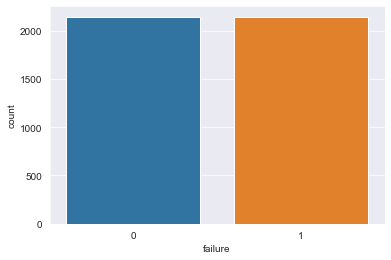

In [133]:
##Barchart om de verdeling van failures & non-failures in kaart te brengen, comment onderstaande regel code wanneer de scatterplot wordt gebruikt
sb.countplot(dfSmall_oversampled['failure'])

##Scatterplot om de verdeling van failures & non-failures in kaart te brengen, comment onderstaande regel code wanneer de barchart wordt gebruikt
# sb.scatterplot(data = dfSmall_oversampled, x='pressure', y='age', hue='failure')

##Het tellen van de unieke waardes voor failures en non-failures in het dataframe waarbij 0: non-failure, 1: failure
dfSmall_oversampled['failure'].value_counts()

#### 3.1.8.5 Op voorhand splitsen algemene testset<a class="anchor" id="Chapter3.1.8.5"></a><br>
Om aan het einde van de rit een valide evaluatie te kunnen maken omtrent het beste model is het van belang dat er een dataset wordt geselecteerd die als testset kan dienen wanneer modellen getraind zijn. Dit betreft een statische dataset dat niet middels train_test_split wordt ontwikkelt. Deze dataset worden de eerste 500 rijen van het dataframe dfSmall_oversampled en zal pas gebruikt worden bij het maken van voorspellingen door de getrainde modellen.

Om dit concept tot goede orde te voltooien worden de eerste 500 rijen van de dfSmall_oversampled dataframe in een nieuwe variabele opgeslagen. Dit wordt het nieuwe dataframe dfSmall_oversampled_test. Vervolgens dient er een if statement gemaakt te worden die controleert of de lengte van de dfSmall_oversampled nog 4286 is. Wanneer dit het geval is, is het van belang de eerste 500 rijen van dit dataframe te verwijderen aangezien deze 500 rijen (die zijn geselecteerd als statische testset) niet meegenomen mogen worden bij het trainen van modellen. Wanneer dit wel zou gebeuren spreekt men van overfitting en wordt het model op een deel van deze 500 rijen alsnog getraind, terwijl het van belang is dat dit als "nieuwe data" gezien wordt wanneer het model geëvalueerd wordt. 

In [134]:
##Aanmaken nieuwe dataframe op basis van dfSmall_oversampled
dfSmall_oversampled_test = dfSmall_oversampled[0:500]

##Verwijderen eerste 500 rijen van dfSmall_oversampled om te voorkomen dat modellen deze rijen meenemen tijdens het trainen
if len(dfSmall_oversampled) == 4286:
    dfSmall_oversampled.drop(dfSmall_oversampled.index[:500], inplace=True, axis=0)

### 3.1.9. Overzicht dataframes<a class="anchor" id="Chapter3.1.9"></a><br>
Op dit punt zijn veel handelingen uitgevoerd omtrent de oorspronkelijke data. Om deze reden is onderstaand overzicht gecreëerd om inzicht te krijgen in de uiteindelijke dataframes die zijn ontwikkeld en welke handelingen hierop zijn uitgevoerd. Deze datasets zullen gebruikt worden bij het trainen van de modellen. 

|Dataframe|Omschrijving|Eigenschappen|
|---|---|---|
|df|Oorspronkelijk grote dataframe geabseerd op joins om maximaal aantal rijen te behouden|- Samengevoegde bronbestanden|
|**df_encoded**|Oorspronkelijk grote dataframe waarbij kolommen zijn ondervonden aan one-hot-encoding|- Samengevoegde bronbestanden<br> - Kolommen model, error en comp one-hot-encoded. Kan mogelijk gebruikt worden voor het trainen van modellen.|
|dfSmall|Kleine dataframe gefocust op failures waardoor null-values niet meer in de dataframe voorkomen|- Samengevoegde bronbestanden gefocust op failures. Dient niet gebruikt te worden voor het trainen van modellen.|
|**dfSmall_encoded**|Kleine dataframe gefocust op failures waardoor null-values niet meer in de dataframe voorkomen|- Samengevoegde bronbestanden gefocust op failures<br> - Kolommen model, error en comp one-hot-encoded. Kan gebruikt worden voor het trainen van modellen, echter dient hierbij gelet te worden op het feit dat het aantal failures niet genivelleerd is.|
|**dfSmall_encoded_leveled_failures**|Kleine dataframe gefocust op failures waardoor null-values niet meer in de dataframe voorkomen|- Samengevoegde bronbestanden gefocust op failures<br> - Kolommen model, error en comp one-hot-encoded.<br>- Aantal failures genivelleerd middels down sampling. Deze dataset wordt sterk aangeraden om te gebruiken voor het trainen van modellen in combinatie met de dataframe dfSmall_encoded.|
|**dfSmall_oversampled**|Kleine dataframe ontwikkelt als tegenhanger van dfsmall_encoded_leveled_failures waarbij de aantal failures zijn opgeschaald richting hetzelfde aantal non-failures. Het dataframe kent een totaal van 4286 rijen waarbij een even groot aantal failures als non-failures voorkomt.|- Samengevoegde bronbestanden gefocust op failures<br> - Kolommen model, error en comp one-hot-encoded. <br> - Failures opgeschaald naar hetzelfde aantal failures op basis van het SMOTE principe. |
|**dfSmall_oversampled_test**|Dataframe dat op voorhand wordt gemaakt om uiteindelijk een valide evaluatie te maken tussen modellen die getraind worden. Dit dataframe kent een totaal van 500 statische rijen dat als testset gebruikt wordt wanneer de modellen getraind zijn.| - Eerste 500 rijen van dfSmall_oversampled geselecteerd.|

## 3.2. Data Cleaning <a class="anchor" id="Chapter3.2"></a><br>

Deze paragraaf gaat in op het afhandelen van fouten (ook wel artifacts en errors genoemd). Hierbij zijn errors fouten die niet teruggedraaid kunnen worden en artifacts "bugs" die zijn opgetreden gedurende preprocessing/cleaning processen. Dit betekent dat de paragraaf alleen in gaat op de fouten die zijn voortgekomen uit het voorgaande proces, ook wel de artifacten. De [eerste stap](#Chapter3.2.1) hierbij is het controleren en goed zetten van de datatypes waar nodig voor de datasets die gebruikt zullen worden bij het trainen van de modellen.  

### 3.2.1. Corrigeren datatypes <a class="anchor" id="Chapter3.2.1"></a><br>
Gedurende het samenvoegen en bewerken van de oorspronkelijke datasets is het mogelijk dat datatypes van de kolommen hierbij verkeerd is komen te staan. Een voorbeeld hiervan dat een ```pd.concat``` functie er mogelijk voor dat integers omgezet worden naar floats. Ter referentie van een overzicht van de datatypes werd [deze website](https://pbpython.com/pandas_dtypes.html) gebruikt. Het corrigeren van de datatypes zorgt ervoor dat toekomstige modellen de waardes kunnen gebruiken om er berekeningen mee te doen.  

**Stap 1: Achterhalen datatypes**<br>
Om te achterhalen welke datatypes de kolommen hebben wordt eerst de regel code ```<dataframe>.dtypes``` uitgevoerd wat inzicht geeft in de datatypes. Onderstaande codeblokken voeren deze code uit voor de dataframes *df_encoded*, *dfSmall_encoded* en *dfSmall_encoded_leveled_failures*. Een overzicht van de datatypes van iedere kolom (feature) is terug te vinden onder de laatste regel code. 

In [135]:
##Printen van datatypes voor het dataframe df_encoded
df_encoded.dtypes

date          object
timestamp     object
machineID      int64
failure      float64
age            int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
Error1         int32
Error2         int32
Error3         int32
Error4         int32
Error5         int32
comp_1         uint8
comp_2         uint8
comp_3         uint8
comp_4         uint8
model_1        uint8
model_2        uint8
model_3        uint8
model_4        uint8
dtype: object

In [136]:
##Printen van datatypes voor het dataframe dfSmall_encoded
dfSmall_encoded.dtypes

date          object
timestamp     object
machineID      int64
failure        int32
age            int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
Error1         int32
Error2         int32
Error3         int32
Error4         int32
Error5         int32
comp_1         uint8
comp_2         uint8
comp_3         uint8
comp_4         uint8
model_1        uint8
model_2        uint8
model_3        uint8
model_4        uint8
dtype: object

In [137]:
##Printen van datatypes voor het dataframe dfSmall_encoded_leveled_failures
dfSmall_encoded_leveled_failures.dtypes

date          object
timestamp     object
machineID      int64
failure        int32
age            int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
Error1         int32
Error2         int32
Error3         int32
Error4         int32
Error5         int32
comp_1         uint8
comp_2         uint8
comp_3         uint8
comp_4         uint8
model_1        uint8
model_2        uint8
model_3        uint8
model_4        uint8
dtype: object

Onderstaande tabel toont een overzicht van de datatypes voor iedere kolom per dataframe samen met de beoogde datatypes. Aan de hand van dit overzicht zullen de datatypes correct worden gewijzigd. Alle *schuingedrukte* datatypes zijn verkeerd ten opzichte van het beoogde datatype. Dit zijn dus de foute datatypes die in de volgende stap gecorrigeerd worden.  

|Kolom|Beoogd datatype|Huidig dataType in df_encoded|Huidig dataType in dfSmall_encoded|Huidig dataType in dfSmall_encoded_leveled_failures|
|---|---|---|---|---|
|date|object (string)|object (string)|object (string)|object (string)|
|timestamp|object (string)|object (string)|object (string)|object (string)|
|machineID|int64|int64|int64|int64|
|failure|bool|*float64*|*int32*|*int32*|
|age|int64|int64|int64|int64|
|volt|float64|float64|float64|float64|
|rotate|float64|float64|float64|float64|
|pressure|float64|float64|float64|float64|
|vibration|float64|float64|float64|float64|
|Error1|bool|*int32*|*int32*|*int32*|
|Error2|bool|*int32*|*int32*|*int32*|
|Error3|bool|*int32*|*int32*|*int32*|
|Error4|bool|*int32*|*int32*|*int32*|
|Error5|bool|*int32*|*int32*|*int32*|
|comp_1|bool|*uint8*|*uint8*|*uint8*|
|comp_2|bool|*uint8*|*uint8*|*uint8*|
|comp_3|bool|*uint8*|*uint8*|*uint8*|
|comp_4|bool|*uint8*|*uint8*|*uint8*|
|model_1|bool|*uint8*|*uint8*|*uint8*|
|model_2|bool|*uint8*|*uint8*|*uint8*|
|model_3|bool|*uint8*|*uint8*|*uint8*|
|model_4|bool|*uint8*|*uint8*|*uint8*|

**Stap 2: Corrigeren datatypes**<br>
Nu bekend is welke datatypes verkeerd zijn ten opzichte van de beoogde, worden deze in onderstaande 3 blokken code aangepast waarbij het eerste blok in gaat op df_ecoded, het tweede op dfSmall_encoded en het derde op dfSmall_encoded_leveled_failures. Wanneer de onderstaande 3 codeblokken zijn uitgevoerd staan de datatypes van de kolommen correct zoals gewenst en kan er verder mee gewerkt worden. 

In [138]:
##---------Corrigeren datatypes df_encoded------------------
##Omzetten datatypes voor kolommen failure, Error1 t/m Error5, comp_1 t/m comp_4 en model_1 t/m model_4

#Omzetten datatype failure kolom
df_encoded['failure'] = df_encoded['failure'].astype('bool')

#Omzetten datatypes error kolommen
df_encoded[[f'Error{n}' for n in range (1,6)]] = df_encoded[[f'Error{n}' for n in range (1,6)]].astype('bool')

#Omzetten datatypes comp_ kolommen
df_encoded[[f'comp_{n}' for n in range (1,5)]] = df_encoded[[f'comp_{n}' for n in range (1,5)]].astype('bool')

#Omzetten datatypes model_ kolommen
df_encoded[[f'model_{n}' for n in range (1,5)]] = df_encoded[[f'model_{n}' for n in range (1,5)]].astype('bool')

##Optionele check voor datatypes, uncomment voor gebruik
#df_encoded.dtypes

In [139]:
##---------Corrigeren datatypes dfSmall_encoded------------------
##Omzetten datatypes voor kolommen failure, Error1 t/m Error5, comp_1 t/m comp_4 en model_1 t/m model_4

##Omzetten datatype failure kolom
dfSmall_encoded['failure'] = dfSmall_encoded['failure'].astype('bool')

##Omzetten datatypes error kolommen
dfSmall_encoded[[f'Error{n}' for n in range (1,6)]] = dfSmall_encoded[[f'Error{n}' for n in range (1,6)]].astype('bool')

##Omzetten datatypes comp_ kolommen
dfSmall_encoded[[f'comp_{n}' for n in range (1,5)]] = dfSmall_encoded[[f'comp_{n}' for n in range (1,5)]].astype('bool')

##Omzetten datatypes model_ kolommen
dfSmall_encoded[[f'model_{n}' for n in range (1,5)]] = dfSmall_encoded[[f'model_{n}' for n in range (1,5)]].astype('bool')

##Optionele check voor datatypes, uncomment voor gebruik
#dfSmall_encoded.dtypes

In [140]:
##---------Corrigeren datatypes dfSmall_encoded_leveled_failures------------------
##Omzetten datatypes voor kolommen failure, Error1 t/m Error5, comp_1 t/m comp_4 en model_1 t/m model_4

##Omzetten datatype failure kolom
dfSmall_encoded_leveled_failures['failure'] = dfSmall_encoded_leveled_failures['failure'].astype('bool')

##Omzetten datatypes error kolommen
dfSmall_encoded_leveled_failures[[f'Error{n}' for n in range (1,6)]] = dfSmall_encoded_leveled_failures[[f'Error{n}' for n in range (1,6)]].astype('bool')

##Omzetten datatypes comp_ kolommen
dfSmall_encoded_leveled_failures[[f'comp_{n}' for n in range (1,5)]] = dfSmall_encoded_leveled_failures[[f'comp_{n}' for n in range (1,5)]].astype('bool')

##Omzetten datatypes model_ kolommen
dfSmall_encoded_leveled_failures[[f'model_{n}' for n in range (1,5)]] = dfSmall_encoded_leveled_failures[[f'model_{n}' for n in range (1,5)]].astype('bool')

## Optionele check voor datatypes, uncomment voor gebruik
#dfSmall_encoded_leveled_failures.dtypes

# 4. Data Exploration <a class="anchor" id="Chapter4"></a><br>
In dit hoofdstuk worden verschillende verwachtingen vanuit het perspectief van de dataset geformuleerd. Deze verwachtingen zijn gebaseerd op de kennis over de data die in voorgaande hoofdstukken is opgedaan. Deze verwachtingen worden in een later stadium bevestigd of ontkracht middels de realisatie van machine learning modellen. Wanneer men verwachtingen opstelt vanuiit de data, spreekt men over een *hypothesis driven* approach voor het ontwikkelen van een data science project. Allereerst worden in dit hoofdstuk de verwachtingen opgesteld waarna vervolgens een correlatie heatmap wordt ontwikkelt om de relaties tussen de verwachtingen (variabelen) in kaart te brengen. Vervolgens wordt een selectie gemaakt van features en de target (wat er voorspelt dient te worden). Tot slot worden deze variabelen in kaart gebracht middels nuttige visualisaties. Dit allen wordt waar nodig onderbouwt met literatuur.

## 4.1. Verwachtingen <a class="anchor" id="Chapter4.1"></a><br>
In deze paragraaf worden de verwachtingen vanuit de data opgesteld. Eerder is in [paragraaf 1.5](#Chapter1.5) de verwachting genoemd dat de operationele prestaties van de machines invloed hebben op de failures die bij de machines ontstaan. Deze verwachting wordt onderstaande uitgesplitst in meerdere sub-verwachtingen. 

**Sub-verwachtingen:**<br>
1. Het voltage van de machines heeft invloed op het optreden van failures.
2. De rotatie van/in de machines heeft invloed op het optreden van failures.
3. De druk van/binnen de machines heeft invloed op het optreden van failures.
4. De vibratie van de machines heeft invloed op het optreden van failures.

Ook is in [paragraaf 1.5](#Chapter1.5) de verwachting genoemd dat de leeftijd van de machine invloed heeft op de failures van de machines. Deze verwachtingen worden in de volgende paragrafen gevisualiseerd waarbij eerst wordt gekeken naar de hoogste correlaties tussen de variabelen.

## 4.2. Correlatie heatmap <a class="anchor" id="Chapter4.2"></a><br>
Om het verband tussen de onafhankelijke variabelen (features) zoals bijvoorbeeld voltage en de afhankelijke variabele (target) "failure" in kaart te brengen wordt er een correlatie heatmap gerealiseerd. In de correlatie heatmap kan worden afgelezen of er een negatieve, positieve of geen correlatie (verband) aanwezig is tussen een onafhankelijke en afhankelijke variabele. Middels het identificeren van correlaties wordt bekend of de onafhankelijke variabele invloed heeft op de afhankelijke variabele en kunnen de eerder beschreven verwachtingen onderbouwd worden.

Voor elke verwachting, beschreven in de voorgaande paragraaf, wordt de correlatie tussen de onafhankelijke en afhankelijke variabele inclusief de betekenis beschreven in onderstaande tabel. In de tabel wordt ook aangegeven hoe sterk of zwak een correlatie is. De identificatie hiervan is gebaseerd op een tabel uit de bron [Correlatie](https://www.scribbr.nl/statistiek/correlatie/).

| Verwachting | Correlatie | Betekenis Correlatie |
|---|---|---|
| Voltage heeft invloed op failure | 0.11 | Het betreft hier een zeer lage positieve correlatie. Wanneer het voltage van een machine toeneemt zal ook de kans op een failure toenemen. |
| Rotation heeft invloed op failure | - 0.19 | Het betreft hier een zeer lage negatieve correlatie. Wanneer de rotatie van/in een machine toeneemt zal de kans op een failure afnemen. |
| Pressure heeft invloed op failure | 0.15 | Het betreft hier een zeer lage positieve correlatie. Wanneer de druk (pressure) van/binnen een machine toeneemt zal ook de kans op een failure toenemen. |
| Vibration heeft invloed op failure | 0.20 | Het betreft hier een zeer lage positieve correlatie. Wanneer de vibratie van een machine toeneemt zal ook de kans op een failure toenemen. |
| Age heeft invloed op failure | 0.13 | Het betreft een zeer lage positieve correlatie. Wanneer de leeftijd (age) van een machine toeneemt zal ook de kans op een failure toenemen |

Op basis van de correlatie heatmap kan geconcludeerd worden dat voor iedere verwachting de onafhankelijke variabele (feature) een lichte invloed heeft op de afhankelijke variabele (target) "failure".

<AxesSubplot:>

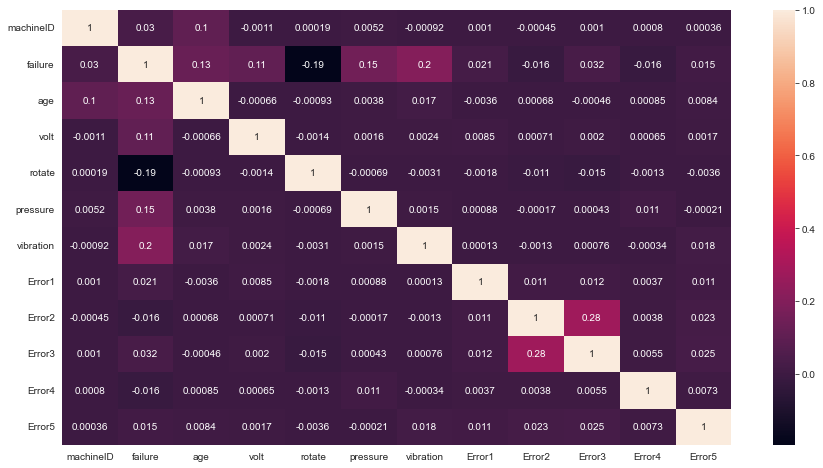

In [141]:
plt.figure(figsize=[15,8])
sb.heatmap(df.corr(),annot=True)

## 4.3. Visuele inzichten <a class="anchor" id="Chapter4.3"></a><br>
Om meer inzicht te krijgen in de features (onafhankelijke variabelen) en target (afhankelijke variabele) gaat deze paragraaf dieper in op het visualiseren en inzichtelijk maken van de datapunten. Voor iedere onafhankelijke variabele worden een aantal overzichtelijke en nuttige visualisaties ontwikkelt die helpen bij het begrijpen van de data. Wanneer deze visualisaties goed zijn opgezet, helpt dit bij het begrijpen van de data wat bevorderlijk is voor het toekomstige ontwikkelen van de modellen. 

Om te beginnen worden eerst de failures in het algemeen in kaart gebracht. Hierbij worden zinvolle visualisaties ontwikkelt die gebruik kunnen maken van features die niet in de hypothesen voorkomen (maar mogelijk wel gebruikt kunnen worden om te filteren). Deze eerste algemene visualisaties van de failures geven richting aan de visualisaties die daarop volgen. Alle opvallende zaken uit [paragraaf 4.3.1](#Chapter4.3.1) worden namelijk mee genomen om in de daarop volgende paragrafen hier dieper op in te gaan.

### 4.3.1. Visuele inzichten failures <a class="anchor" id="Chapter4.3.1"></a><br>
De eerste inzichten worden zoals vermeld gemaakt vanuit het opzicht van de failures. Zo wordt er gekeken naar: 

- Hoeveelheid failures per machine
- Toename van failures over leeftijd van de machine
- Hoeveelheid failures per leeftijd (age) van de machine
- Hoeveelheid failures per component

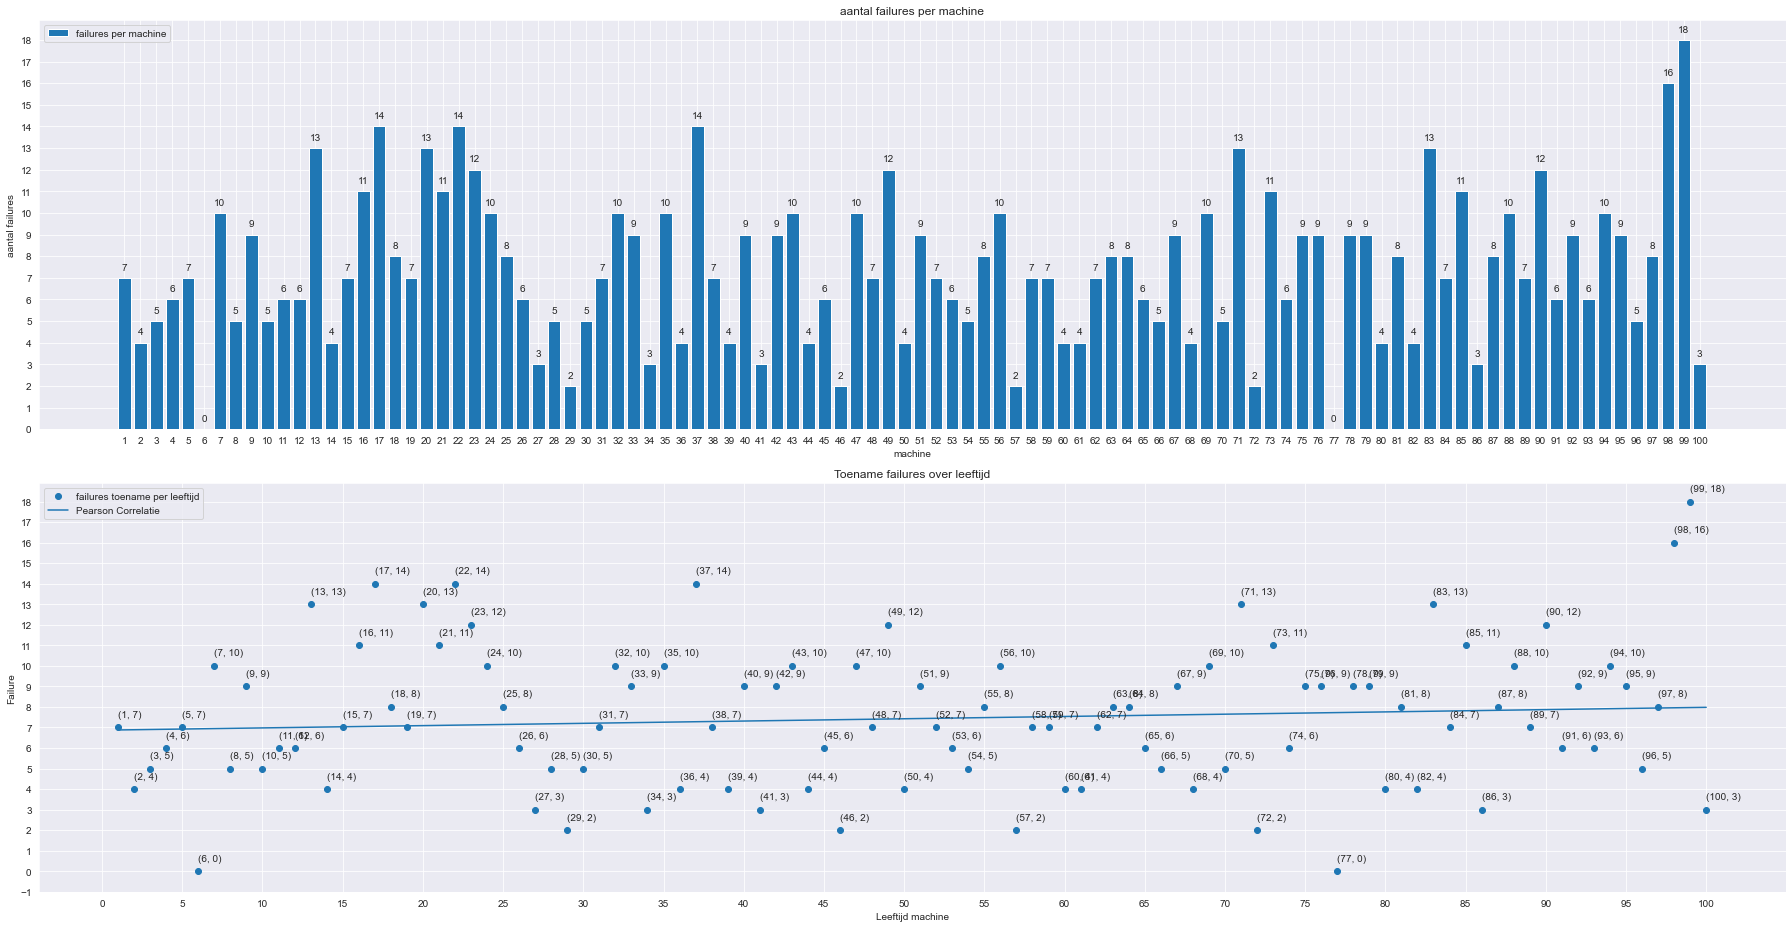

In [142]:
#groeperen van de data op basis van machineID en failure
failureGroupMachineId = dfSmall_encoded['failure'].groupby(dfSmall_encoded['machineID']).sum().reset_index()

#Definiëren x en y
xFailureGroupMachineId = failureGroupMachineId['machineID']
yFailureGroupMachineId = failureGroupMachineId['failure']
#Optionele grenswaarde die kan bepalen welke machines weergegeven dienen te worden
zFailureGroupMachineId = failureGroupMachineId.loc[failureGroupMachineId['failure'] >= 5].copy()

#Aanmaken figuur en assen 
figFailureGroupMachineId, (ax1, ax2) = plt.subplots(2, 1, figsize=(23,35))
figFailureGroupMachineId.set_figheight(13)
figFailureGroupMachineId.set_figwidth(25)

##-----------Hoeveelheid failures per machine-----------------

#Aanmaken barchart op ax1
bcFailureGroupMachineId = ax1.bar(xFailureGroupMachineId, yFailureGroupMachineId, label='failures per machine', align='center')
ax1.set_title('aantal failures per machine')
ax1.set_ylabel('aantal failures')
ax1.set_xlabel('machine')
ax1.bar_label(bcFailureGroupMachineId, padding=6)
#Zetten van de xticks
ax1.set_xticks(np.arange(min(xFailureGroupMachineId), max(xFailureGroupMachineId)+1, 1.0))
#Zetten van de yticks
ax1.set_yticks(np.arange(min(yFailureGroupMachineId), max(yFailureGroupMachineId)+1, 1.0))
#aanmaken legenda
ax1.legend()

##-----------Toename van failures over leeftijd van de machine-----------------

#Aanmaken scatterplot op ax2
spFailureGroupMachineId = ax2.scatter(xFailureGroupMachineId, yFailureGroupMachineId, label='failures toename per leeftijd')
ax2.set_title('Toename failures over leeftijd')
ax2.set_ylabel('Failure')
ax2.set_xlabel('Leeftijd machine')
#Zetten van coordinaten in de scatterplot
for i, j in zip(xFailureGroupMachineId, yFailureGroupMachineId):
    ax2.text(i, j+0.5, '({}, {})'.format(i, j))
#Pearson R correlatie coefficient lijn
a, b = polyfit(xFailureGroupMachineId, yFailureGroupMachineId, 1)
ax2.plot(xFailureGroupMachineId, a + b * xFailureGroupMachineId, '-', label='Pearson Correlatie')
#Zetten van de xticks
ax2.set_xticks(np.arange(min(xFailureGroupMachineId)-1, max(xFailureGroupMachineId)+1, 5.0))
#Zetten van de yticks
ax2.set_yticks(np.arange(min(yFailureGroupMachineId)-1, max(yFailureGroupMachineId)+1, 1.0))
ax2.legend()

plt.tight_layout()
plt.show()

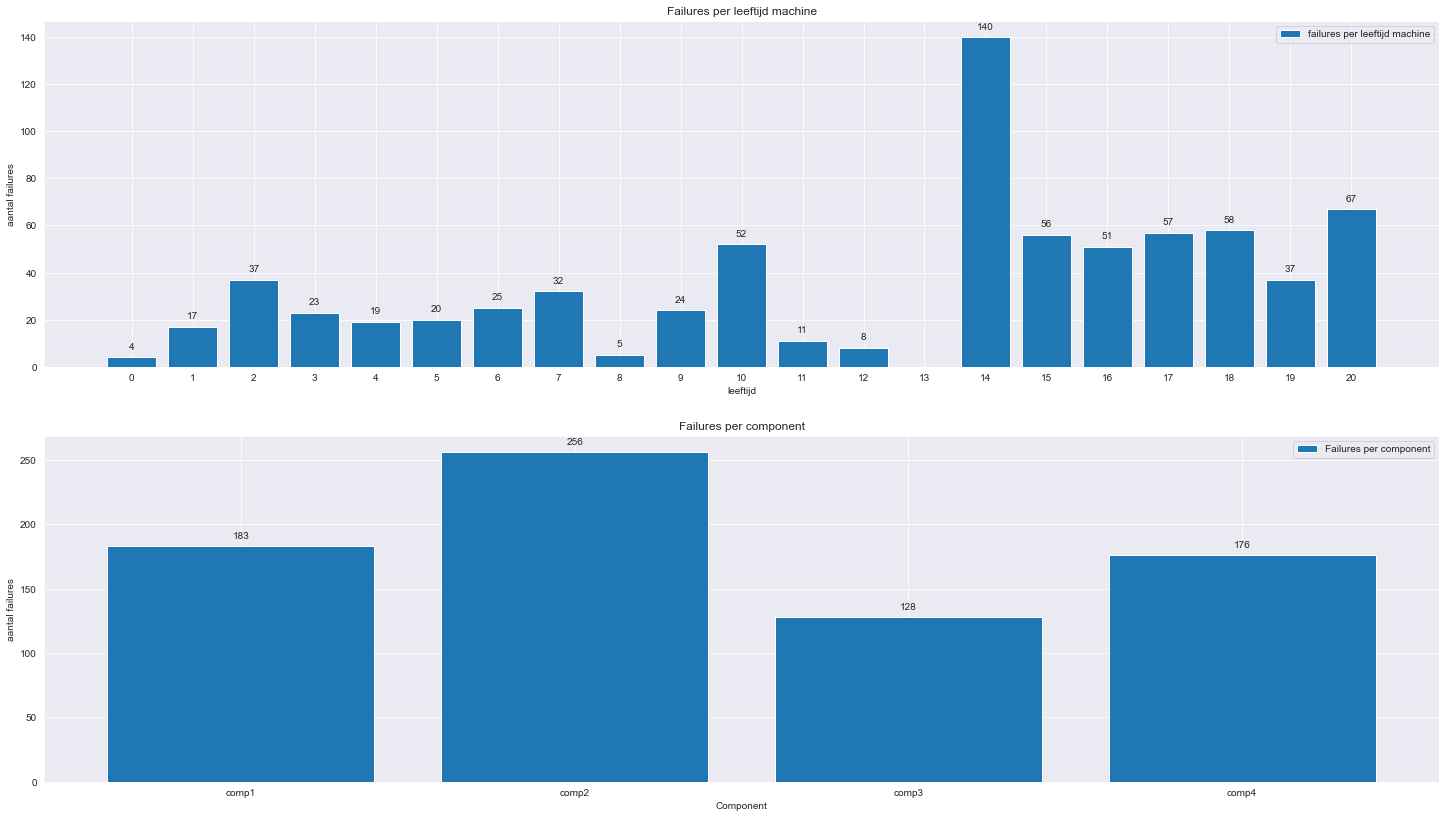

In [143]:
##-----------Hoeveelheid failures per leeftijd (age) van de machine-----------------
#groeperen van de data op basis van age en failure
failureGroupMachineAge = dfSmall_encoded['failure'].groupby(dfSmall_encoded['age']).sum().reset_index()
failureGroupMachineComp = dfSmall_encoded['failure'].groupby(dfSmall['comp']).sum().reset_index()

#Definiëren x en y voor machine failure en age
xFailureGroupMachineAge = failureGroupMachineAge['age']
yFailureGroupMachineAge = failureGroupMachineAge['failure']
#Optionele grenswaarde die kan bepalen welke machines weergegeven dienen te worden
zFailureGroupMachineAge = failureGroupMachineAge.loc[failureGroupMachineAge['failure'] >= 5].copy()

#Definiëren van x en y voor machine component chart
xFailureGroupMachineComp = failureGroupMachineComp['comp']
yFailureGroupMachineComp = failureGroupMachineComp['failure']

#Aanmaken figuur en assen 
figFailureGroupMachineAge, (ax1, ax2) = plt.subplots(2, 1, figsize=(35,55))
figFailureGroupMachineAge.set_figheight(14)
figFailureGroupMachineAge.set_figwidth(25)

##-----------Hoeveelheid failures per leeftijd (age) van de machine-----------------

#Aanmaken barchart op ax1
bcFailureGroupMachineAge = ax1.bar(xFailureGroupMachineAge, yFailureGroupMachineAge, label='failures per leeftijd machine', align='center')
ax1.set_title('Failures per leeftijd machine')
ax1.set_ylabel('aantal failures')
ax1.set_xlabel('leeftijd')
ax1.bar_label(bcFailureGroupMachineAge, padding=6)
#Zetten van de xticks
ax1.set_xticks(np.arange(min(xFailureGroupMachineAge), max(xFailureGroupMachineAge)+1, 1.0))
#aanmaken legenda
ax1.legend()

#Aanmaken barchart op ax2
bcFailureGroupMachineComp = ax2.bar(xFailureGroupMachineComp, yFailureGroupMachineComp, label='Failures per component', align='center')
ax2.set_title('Failures per component')
ax2.set_ylabel('aantal failures')
ax2.set_xlabel('Component')
ax2.bar_label(bcFailureGroupMachineComp, padding=6)
#Zetten van de xticks
# ax2.set_xticks(np.arange(min(xFailureGroupMachineAge), max(xFailureGroupMachineAge)+1, 1.0))
#aanmaken legenda
ax2.legend()

plt.show()

### 4.3.2. Visuele inzichten volt <a class="anchor" id="Chapter4.3.2"></a><br>
De eerste visualisaties omtrent de prestaties van de machines gaat in op de verwachting dat volt invloed zou hebben op het falen van de machine. Hiervoor wordt in deze paragraaf volt inzichtelijk gemaakt op verschillende manieren. Onderstaande code laten de volgende onderwerpen zien:

- Algemene statistiek van voltage (aantal rijen, gemiddelde, standaardafwijking, minimale waarde etc.)
- Algemene verdeling van data in de volt kolom middels een boxplot
- Distributie van volt (over alle machines)

In [144]:
##Omschrijven van de algemene kentallen van de voltage kolom
dfSmall_encoded['volt'].describe()

count    2886.000000
mean      172.320941
std        16.557797
min       115.638391
25%       161.240643
50%       171.961489
75%       182.836200
max       235.493717
Name: volt, dtype: float64

In [145]:
##Aanmaken generieke functies die op ieder mogelijk punt aangeroepen kunnen worden
##Aanmaken historyPlot functie
def historyplot(df, feature_name, kind='hist', bins=100, log=True):
    dfSmall_encoded[feature_name].plot(kind=kind, bins=bins, figsize=(15,5), title=f'Distributie van {feature_name}', edgecolor='black')
    plt.show()

##Aanmaken boxplot functie
def boxplot(df, feature_name, kind='box', vert=False, patch_artist=True):
    dfSmall_encoded[feature_name].plot(kind=kind, vert=vert, figsize = (15,5), title=f'Boxplot van {feature_name}')
    plt.show()

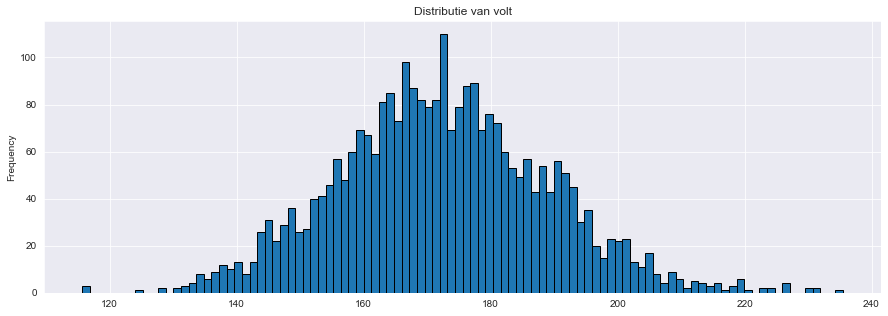

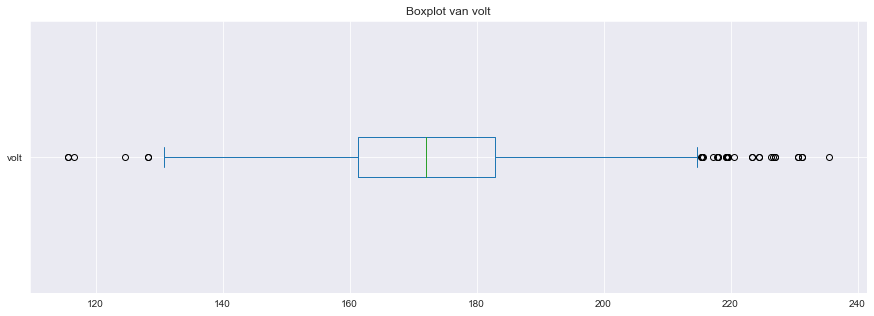

In [146]:
##Aanroepen visualisatie functies
for volt in ['volt']:
    historyplot(dfSmall_encoded, feature_name=volt, log=True, bins=100),
    boxplot(dfSmall_encoded, feature_name=volt, vert=False, patch_artist=True)

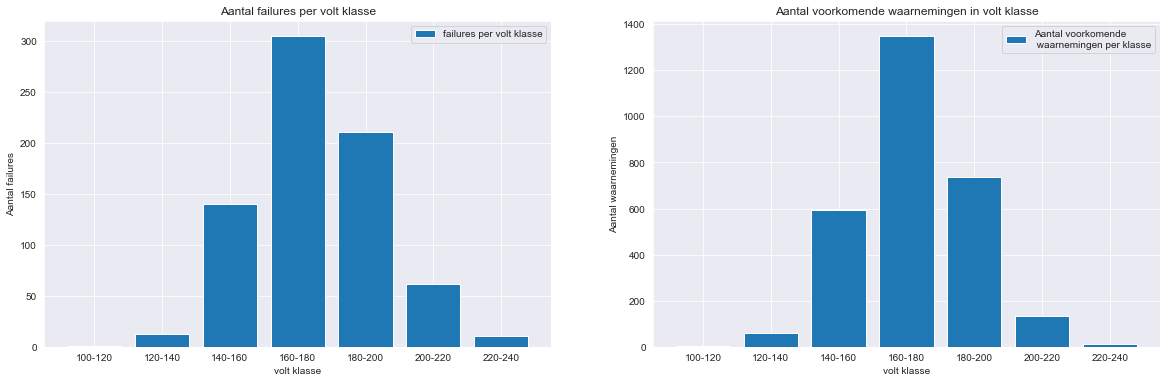

In [147]:
# volt min = 115.638391
# volt max = 235.493717
# bins: 100, 120, 140, 160, 180, 200, 220, 240

# dfSmall_encoded['volt'].describe()

toCutVolt = dfSmall_encoded.volt
labelsUsedVolt = [
    '100-120',
    '120-140',
    '140-160',
    '160-180',
    '180-200',
    '200-220',
    '220-240'
]

voltcat = pd.cut(toCutVolt,bins=[100, 120, 140, 160, 180, 200, 220, 240],
    labels=labelsUsedVolt)

if 'volt_class' not in dfSmall_encoded.columns:
    dfSmall_encoded.insert(6,'volt_class',voltcat) #Inserts the records into the new columns 

## Building the graphic

#Grouping only takes the [1] values in failure
failureGroupVoltdf = dfSmall_encoded['failure'].groupby(dfSmall_encoded['volt_class']).sum().reset_index()
x = failureGroupVoltdf['volt_class']
y = failureGroupVoltdf['failure']
z = dfSmall_encoded['volt'].groupby(dfSmall_encoded['volt_class']).count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

ax1.bar(x, y, label='failures per volt klasse', align='center')
ax1.set_title('Aantal failures per volt klasse')
ax1.set_ylabel('Aantal failures')
ax1.set_xlabel('volt klasse')
ax1.legend()

ax2.bar(x, z, label='Aantal voorkomende \n waarnemingen per klasse', align='center')
ax2.set_title('Aantal voorkomende waarnemingen in volt klasse')
ax2.set_ylabel('Aantal waarnemingen')
ax2.set_xlabel('volt klasse')
ax2.legend()

plt.show()

### 4.3.3. Visuele inzichten rotate <a class="anchor" id="Chapter4.3.3"></a><br>
De tweede groep visualisaties omtrent de prestaties van de machines gaat in op de verwachting dat rotatie invloed zou hebben op het falen van de machine. Hiervoor wordt in deze paragraaf rotatie inzichtelijk gemaakt op dezelfde wijze als bij de andere telemetrie gegevens. Onderstaande code laten de volgende onderwerpen zien:

- Algemene statistiek van rotatie (aantal rijen, gemiddelde, standaardafwijking, minimale waarde etc.)
- Algemene verdeling van data in de rotatie kolom middels een boxplot
- Distributie van rotatie (over alle machines)

In [148]:
##Omschrijven van de algemene kentallen van de voltage kolom
dfSmall_encoded['rotate'].describe()

count    2886.000000
mean      439.857734
std        57.548657
min       207.448002
25%       403.701036
50%       444.010140
75%       478.946783
max       619.694725
Name: rotate, dtype: float64

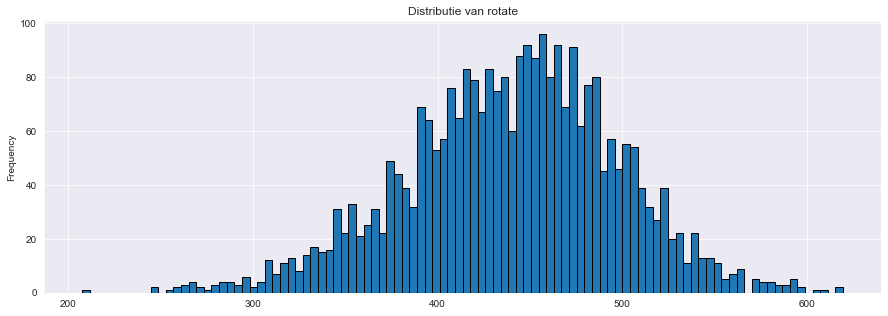

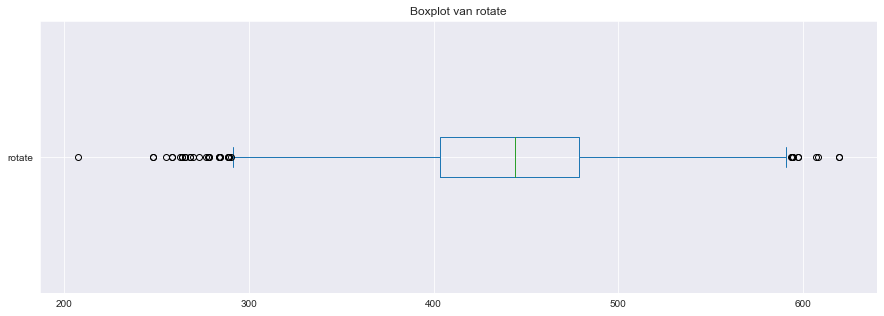

In [149]:
##Aanroepen visualisatie functies
for rotate in ['rotate']:
    historyplot(dfSmall_encoded, feature_name=rotate, log=True, bins=100)
    boxplot(dfSmall_encoded, feature_name=rotate, vert=False, patch_artist=True)

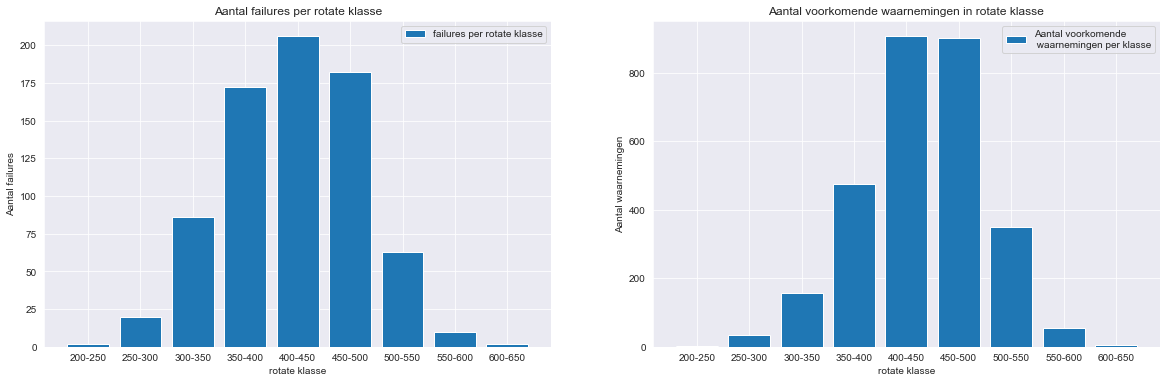

In [150]:
# rotate min = 207.448002
# rotate max = 619.694725
# bins: 200, 250, 300, 350, 400, 450, 500, 550, 600, 650

# dfSmall_encoded['rotate'].describe()

toCutRotate = dfSmall_encoded.rotate
labelsUsedRotate = [
    '200-250',
    '250-300', 
    '300-350',
    '350-400',
    '400-450',
    '450-500',
    '500-550',
    '550-600',
    '600-650'
]

rotatecat = pd.cut(toCutRotate,bins=[200, 250, 300, 350, 400, 450, 500, 550, 600, 650],
    labels=labelsUsedRotate)

if 'rotate_class' not in dfSmall_encoded.columns:
    dfSmall_encoded.insert(8,'rotate_class',rotatecat) #Inserts the records into the new columns 

## Building the graphic

#Grouping only takes the [1] values in failure
FailureGroupRotatedf = dfSmall_encoded['failure'].groupby(dfSmall_encoded['rotate_class']).sum().reset_index()
x = FailureGroupRotatedf['rotate_class']
y = FailureGroupRotatedf['failure']
z = dfSmall_encoded['rotate'].groupby(dfSmall_encoded['rotate_class']).count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

ax1.bar(x, y, label='failures per rotate klasse', align='center')
ax1.set_title('Aantal failures per rotate klasse')
ax1.set_ylabel('Aantal failures')
ax1.set_xlabel('rotate klasse')
ax1.legend()

ax2.bar(x, z, label='Aantal voorkomende \n waarnemingen per klasse', align='center')
ax2.set_title('Aantal voorkomende waarnemingen in rotate klasse')
ax2.set_ylabel('Aantal waarnemingen')
ax2.set_xlabel('rotate klasse')
ax2.legend()

plt.show()

### 4.3.4. Visuele inzichten pressure <a class="anchor" id="Chapter4.3.4"></a><br>
De derde groep visualisaties omtrent de prestaties van de machines gaat in op de verwachting dat druk (pressure) invloed zou hebben op het falen van de machine. Hiervoor wordt in deze paragraaf pressure inzichtelijk gemaakt op dezelfde wijze als bij de andere telemetrie gegevens. Onderstaande code laten de volgende onderwerpen zien:

- Algemene statistiek van pressure (aantal rijen, gemiddelde, standaardafwijking, minimale waarde etc.)
- Algemene verdeling van data in de pressure kolom middels een boxplot
- Distributie van pressure (over alle machines)

In [151]:
##Omschrijven van de algemene kentallen van de voltage kolom
dfSmall_encoded['pressure'].describe()

count    2886.000000
mean      102.494901
std        12.324100
min        69.759427
25%        94.189912
50%       101.449449
75%       109.201334
max       168.992513
Name: pressure, dtype: float64

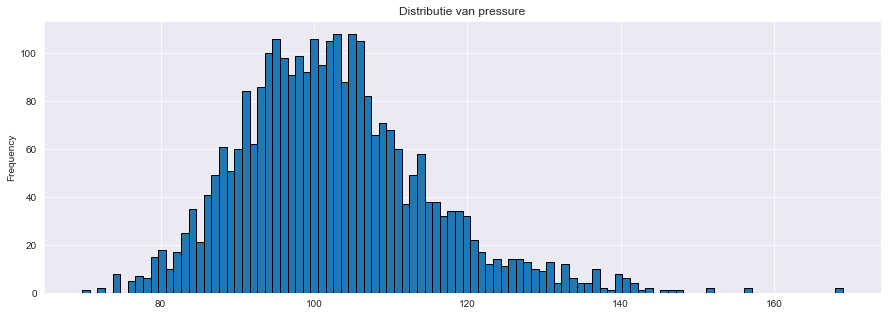

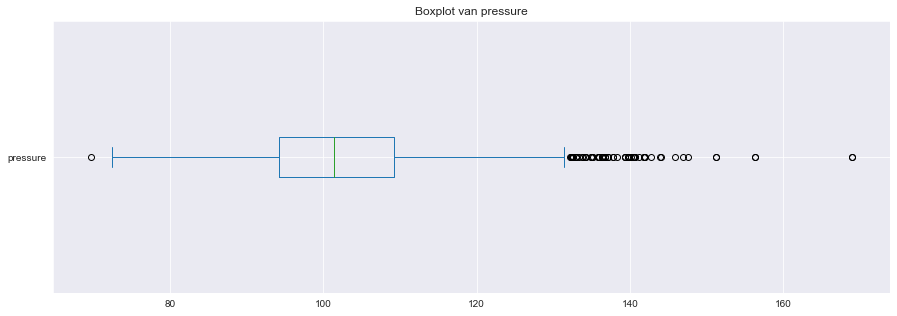

In [152]:
##Aanroepen visualisatie functies
for pressure in ['pressure']:
    historyplot(dfSmall_encoded, feature_name=pressure, log=True, bins=100)
    boxplot(dfSmall_encoded, feature_name=pressure, vert=False, patch_artist=True)

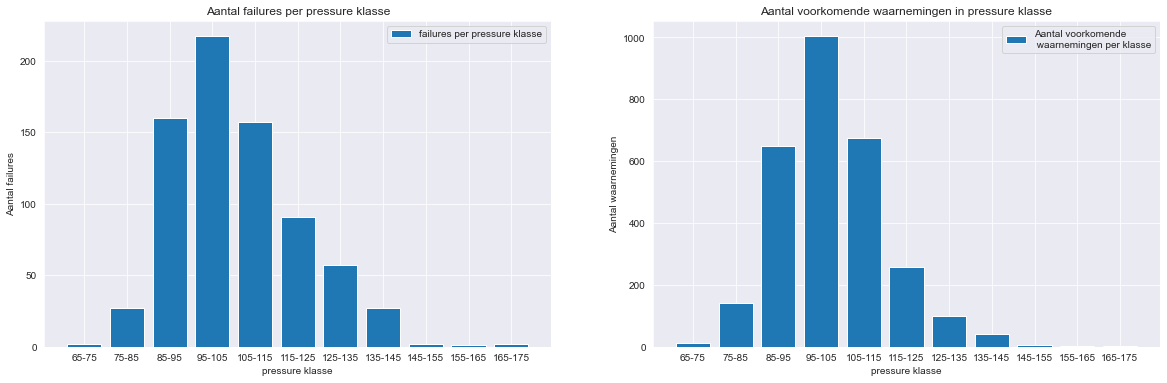

In [153]:
# pressure min = 69.759427
# pressure max = 168.992513
# bins: 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175

# dfSmall_encoded['pressure'].describe()

toCutPressure = dfSmall_encoded.pressure
labelsUsedPressure = [
    '65-75',
    '75-85',
    '85-95',
    '95-105',
    '105-115',
    '115-125',
    '125-135',
    '135-145',
    '145-155',
    '155-165',
    '165-175'
]

pressurecat = pd.cut(toCutPressure,bins=[65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175],
    labels=labelsUsedPressure)

if 'pressure_class' not in dfSmall_encoded.columns:
    dfSmall_encoded.insert(10,'pressure_class',pressurecat) #Inserts the records into the new columns 

## Building the graphic

#Grouping only takes the [1] values in failure
FailureGroupPressuredf = dfSmall_encoded['failure'].groupby(dfSmall_encoded['pressure_class']).sum().reset_index()
x = FailureGroupPressuredf['pressure_class']
y = FailureGroupPressuredf['failure']
z = dfSmall_encoded['pressure'].groupby(dfSmall_encoded['pressure_class']).count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

ax1.bar(x, y, label='failures per pressure klasse', align='center')
ax1.set_title('Aantal failures per pressure klasse')
ax1.set_ylabel('Aantal failures')
ax1.set_xlabel('pressure klasse')
ax1.legend()

ax2.bar(x, z, label='Aantal voorkomende \n waarnemingen per klasse', align='center')
ax2.set_title('Aantal voorkomende waarnemingen in pressure klasse')
ax2.set_ylabel('Aantal waarnemingen')
ax2.set_xlabel('pressure klasse')
ax2.legend()

plt.show()

### 4.3.5. Visuele inzichten vibration <a class="anchor" id="Chapter4.3.5"></a><br>
De vierde en laatste groep visualisaties omtrent de prestaties van de machines gaat in op de verwachting dat vibratie invloed zou hebben op het falen van de machine. Hiervoor wordt in deze paragraaf vibratie inzichtelijk gemaakt op dezelfde wijze als bij de andere telemetrie gegevens. Onderstaande code laten de volgende onderwerpen zien:

- Algemene statistiek van vibration (aantal rijen, gemiddelde, standaardafwijking, minimale waarde etc.)
- Algemene verdeling van data in de vibration kolom middels een boxplot
- Distributie van vibration (over alle machines)

In [154]:
##Omschrijven van de algemene kentallen van de voltage kolom
dfSmall_encoded['vibration'].describe()

count    2886.000000
mean       41.140502
std         5.944998
min        21.952829
25%        37.150955
50%        40.927438
75%        44.703235
max        63.246018
Name: vibration, dtype: float64

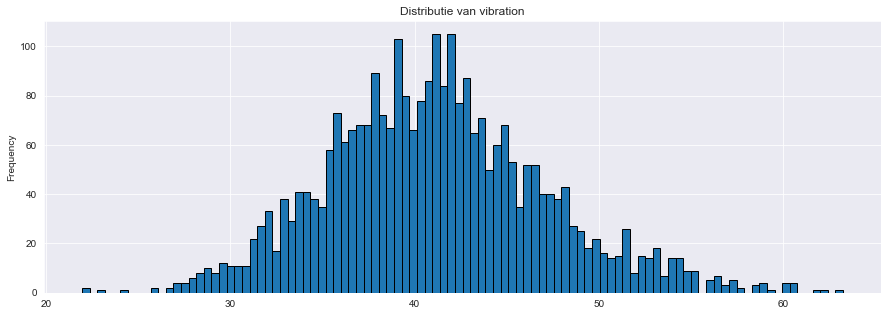

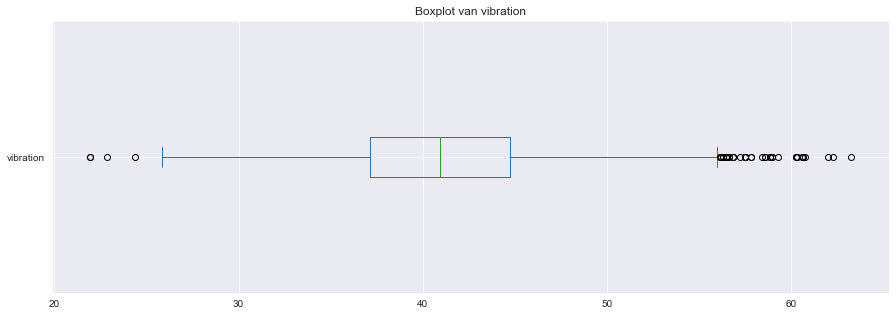

In [155]:
##Aanroepen visualisatie functies
for vibration in ['vibration']:
    historyplot(dfSmall_encoded, feature_name=vibration, log=True, bins=100)
    boxplot(dfSmall_encoded, feature_name=vibration, vert=False, patch_artist=True)

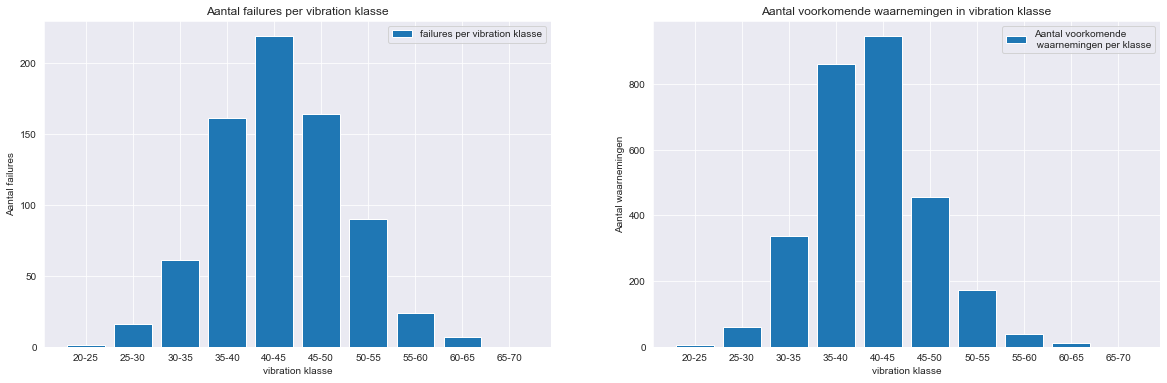

In [156]:
# vibration min = 21.952829
# vibration max = 63.246018
# bins: 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70

dfSmall_encoded['vibration'].describe()

toCut = dfSmall_encoded.vibration
labelsUsed = [
    '20-25',
    '25-30',
    '30-35',
    '35-40',
    '40-45',
    '45-50',
    '50-55',
    '55-60',
    '60-65',
    '65-70'
]

vibrationcat = pd.cut(toCut,bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    labels=labelsUsed)

if 'vibration_class' not in dfSmall_encoded.columns:
    dfSmall_encoded.insert(12,'vibration_class',vibrationcat) #Inserts the records into the new columns, but when executed again another code should be used(?)

else:
    dfSmall_encoded=dfSmall_encoded

## Building the graphic

#Grouping only takes the [1] values in failure
vibrationGroupRotatedf = dfSmall_encoded['failure'].groupby(dfSmall_encoded['vibration_class']).sum().reset_index()
x = vibrationGroupRotatedf['vibration_class']
y = vibrationGroupRotatedf['failure']
z = dfSmall_encoded['vibration'].groupby(dfSmall_encoded['vibration_class']).count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

ax1.bar(x, y, label='failures per vibration klasse', align='center')
ax1.set_title('Aantal failures per vibration klasse')
ax1.set_ylabel('Aantal failures')
ax1.set_xlabel('vibration klasse')
ax1.legend()

ax2.bar(x, z, label='Aantal voorkomende \n waarnemingen per klasse', align='center')
ax2.set_title('Aantal voorkomende waarnemingen in vibration klasse')
ax2.set_ylabel('Aantal waarnemingen')
ax2.set_xlabel('vibration klasse')
ax2.legend()

plt.show()

### 4.3.6. Visuele inzichten age <a class="anchor" id="Chapter4.3.6"></a><br>

Voor de visuale inzichten van age zijn er een aantal visuals gemaakt. De eerste van deze visuals is een boxplot die de leeftijd van machines in zijn geheel weergeeft. De tweede visual is een diagram die een hoeveelheid modellen tegenover leeftijd zet. Welke hoeveelheid van welk model per leeftijd voorkomt.

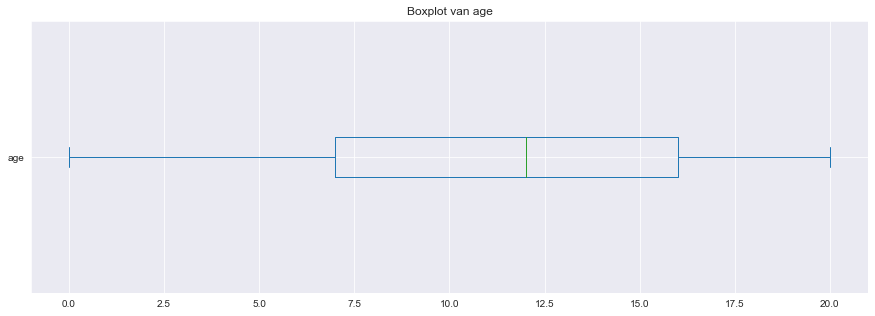

In [157]:
## Verdeling van age door middel van boxplot
for age in ['age']:
    boxplot(dfSmall_encoded, feature_name=age, vert=False, patch_artist=True)

In [158]:
##MachineID, model en age in een dataframe zetten
dfMachines['model'] = dfMachines['model'].astype('category')
dfMachines

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
...,...,...,...
95,96,model2,10
96,97,model2,14
97,98,model2,20
98,99,model1,14


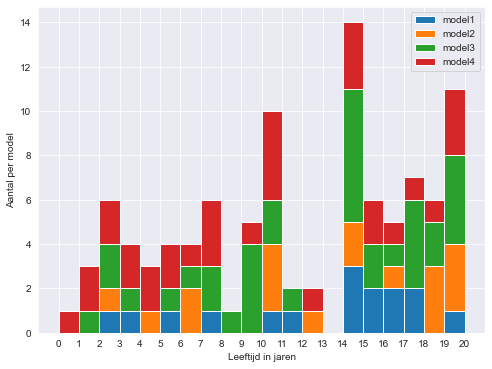

In [159]:
## Overzicht van aantal per model tegenover leeftijd
sb.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([dfMachines.loc[dfMachines['model'] == 'model1', 'age'],
                       dfMachines.loc[dfMachines['model'] == 'model2', 'age'],
                       dfMachines.loc[dfMachines['model'] == 'model3', 'age'],
                       dfMachines.loc[dfMachines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])

plt.xlabel('Leeftijd in jaren')
plt.ylabel('Aantal per model')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.legend()

## 4.4. Overweging algoritmen <a class="anchor" id="Chapter4.4"></a><br>
Op basis van de huidige kennis omtrent de verwachtingen, dataset en doelstelling is het van belang een overweging te maken welke algoritmes er uitgewerkt zullen worden. Hierbij is het eerst van belang een duidelijk beeld te hebben van het *probleem* waarmee men te maken heeft. Aangezien het doel van het project het voorspellen van failures betreft (die de waarden 0 en 1 kunnen aannemen), betreft het een classificatie probleem. Hierdoor is het van belang de verschillende mogelijke classificatie algoritmen (zoals bekend bij de onderzoekers) af te wegen om een besluit te nemen welk model er gekozen wordt. Onderstaande tabel toont een overzicht van de voor- en nadelen van deze classificatie algoritmen. 

|Algoritme|Concept|<div style="width:250px">Voordelen</div>|<div style="width:250px">Nadelen</div>|
|:---:|---|---|---|
|Logistische Regressie|Machine learning algoritme dat is gebaseerd op kansen waarbij een zogeheten Sigmoid functie wordt gebruikt om een S-curve te tekenen. Hierbij wordt de kans op de y-as geplot en de onafhankelijke variabele(n) op de x-as. De waarde op de y-as loopt van 0 tot 1 om een kans te representeren. Wanneer de waarde van x toeneemt, neemt de kans op 1 op de y-as ook toe. Hierbij wordt een grens van 0.5 genahteerd. Wanneer een kans hieronder valt of hier gelijk aan is wordt de y 0, is dit groter dan 0.5 dan wordt y 1. In het kader van het project zou hier de failure op de y as geplaatst worden en op de x-as onafhankelijke variabele(n). Meer informatie omtrent logistische regressie is te vinden op [deze website](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148).|-Gemakkelijk te implementeren <br> -Maakt het updaten van modellen gemakkelijk (bij het invoeren van nieuwe data). <br> -Output betreft een goed berekende kans. <br> -Niet erg gevoelig voor over-fitting in een lage dimensionale dataset. <br> -Vaak gehanteerd als benchmark model. <br> -Zeer efficiënt wanneer features linear te scheiden zijn.|-Lastig te visualiseren wanneer er één dan feature wordt gehanteerd. <br> -Niet-lineair te scheiden data is niet voorspelbaar. <br> - Lastig om complexe relaties onderling te vinden. <br> -Alleen relevante en belangrijke features dienen gebruikt te worden voor goede resultaten. |
|Decision Trees|Een beslissingsboom is een grafische voorstelling van mogelijke oplossingen voor een beslissing op basis van bepaalde voorwaarden. Het wordt een beslisboom genoemd omdat het begint met een enkel vakje (of wortel), dat zich vervolgens vertakt in een aantal oplossingen, net als een boom. Beslisbomen zijn nuttig, niet alleen omdat het grafieken zijn die helpen te "zien" wat u denkt, maar ook omdat het maken van een beslisboom een systematisch, gedocumenteerd denkproces vereist. Meer informatie is te vinden op [deze website](https://www.xoriant.com/blog/product-engineering/decision-trees-machine-learning-algorithm.html#:~:text=Introduction%20Decision%20Trees%20are%20a,namely%20decision%20nodes%20and%20leaves.).|-Eenvoudig te begrijpen en interpreteren. <br> -Vereist relatief weinig preparatie (data pre-processing). <br> -Kan zowel met numerieke als categorische data omgaan. <br> -White box, ofwel zeer transparant in werking en training.|-Neiging om te complex te worden. <br> -Groot risico op overfitting waardoor: <br> -Het model onstabiel wordt bij het optreden van veel variatie en; <br> - Een hoge bias optreedt.|
|Random Forests|Het random forest model is bedoelt om de nadelen van de decision tree weg te nemen. Doordat het een Ensemble model betreft maakt het beslissingen op basis van *verschillende decision trees*. Door willekeurige bootstraps (aparte datasets) op te stellen worden een *n* aantal decision trees opgebouwd waarna deze allen tot één voorspelling komen. Zo zorgen dus meerdere decision trees voor één voorspelling en wordt een random forest dan ook wel een Ensemble model genoemd (een samenkomstigheid van individuele modellen). Meer informatie over random forests in het globale aspect is te vinden op [deze website](https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/). De werking van een random forest wordt diepgaand besproken op de [website van Towards Data Science](https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20random%20forest%20is%20a,that%20of%20any%20individual%20tree.). Voor en nadelen gevonden op [towardsai.net](https://towardsai.net/p/machine-learning/why-choose-random-forest-and-not-decision-trees).|- Robuust voor outliers. <br> -Laag risico tot overfitting. <br> -Betere accuracy dan andere classificatie algoritmen. <br> -Werkt efficiënt op grote datasets.|-Hebben snel een bias wanneer er met categorische variabelen wordt gewerkt. <br>-Langzame trainingssnelheid. <br> -Niet toepasbaar voor lineaire methoden met schaarse features.|
|Neural Networks|Een set aan algoritmen gebaseerd op het concept van neuronen in het mensenlijk brein. Neurale netwerken nemen ruwe input data en gaan hier vervolgens mee aan de slag om deze te classificeren. Bij een input-layer komt de data binnen, vervolgens loopt het langs neuronen die verborgen zitten in de hidden layers om uiteindelijk tot een geactiveerde neuron in de output layer uit te komen. Het proces voor het *activeren* van de neuronen gebeurd op basis van een activatiefunctie (waarvan er verschillende bestaan). Hierbij worden gewichten aan verbindingen tussen neuronen meegegeven en biasses. Het algoritme gaat vervolgens zelf middels meerdere iteraties de biasses en gewichten optimaliseren om tot een zo goed mogelijke voorspelling te komen, dit wordt ook wel *gradient descent/back propagation genoemd.* Wanneer het neurale netwerk een *state of convergence* heeft bereikt betekent dit dat het neurale netwerk is geoptimaliseerd en nieuwe input data en meer back propagations geen betere prestaties meer zullen opleveren. Een korte introductie in neurale netwerken is de [webpagina van Pathmind](https://wiki.pathmind.com/neural-network). Het proces van leren van een Neural Network is te vinden op een [webpagina van KDNuggets](https://www.kdnuggets.com/2020/08/how-neural-networks-learn.html). Hiernaast zijn de voor- en nadelen gevonden van de neurale netwerken op de [website van Passioned Group](https://www.passionned.com/bi/predictive-analytics/neural-network/).|-In staat vage en incomplete data te verwerken. <br> -Toepasbaar in vele soorten vraagstukken. <br> -Effectief bij het herkennen van afbeeldingen.|-Betreft een blackbox algoritme (niet zichtbaar wat er gebeurd). <br> -Traint het meest langzaam t.o.v. andere algoritmen. <br> -De kwaliteit van de uitkomst berust heel sterk op de kwaliteit van de data die er in gaat, sterker dan bij andere algoritmen.|
|Support Vector Machine|SVM of Support Vector Machine is een lineair model voor classificatie- en regressieproblemen. Het kan zowel lineaire en niet-lineaire problemen oplossen. Het algoritme creëert een lijn of een hypervlak dat de gegevens in klassen scheidt. Aan de hand van het SVM-algoritme worden de punten gezocht die het dichtst bij de lijn liggen van beide klassen. Deze punten worden support vectoren genoemd. Nu wordt de afstand berekend tussen de lijn en de vectoren waarbij deze afstand de marge wordt genoemd waarbij het doel is de marge te maximaliseren. Het hypervlak waarvoor de marge maximaal is, wordt het optimale hypervlak genoemd. Zie voor meer inhoudelijke introducerende informatie [deze website](https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/)|-Werken relatief goed wanneer er een duidelijke lineaire scheiding tussen klassen te maken is. <br> -Effectief in hoge dimensionele ruimtes (veel features). <br> -Effectief in gevallen waar het aantal dimensies hoger is dan het aantal rijen (samples). <br> -Maakt gebruik van een subset voor de beslissingsfunctie (support vectors) waardoor het efficiënt is met geheugen van de computer.|-Niet geschikt voor grote datasets gezien de trainingstijd hoger wordt. <br> -Presteert niet goed wanneer de dataset veel noise heeft en de klassen overlappen. <br> -Geeft niet direct de kanswaarden maar worden berekend op basis van een dure five-fold cross validatie waardoor de computer snelheid (vermoge) snel afneemt.|

In totaal worden er twee algoritmen gekozen waarbij er één verder uitgewerkt en geoptimaliseerd zal worden. Hierbij wordt gekozen voor de twee modellen Logistische regressie en Support Vector Machines. De Logistische regressie geldt als benchmark model en wordt hierom als eerst uitgevoerd aangezien dit tevens een van de voordelen betreft. Hiernaast is het algoritme gemakkelijk te implementeren en is het niet overgevoelig voor over-fitting wanneer met een laag aantal dimensies gewerkt zal worden (de dimensies zijn in dit geval de telemetrie gegevens en age wat een totaal van 5 kolommen betreft). Hiernaast wordt er gekozen voor een geavanceerder classificatie algoritme. Het Support Vector Machine model. Dit wordt gekozen gezien het een tegenhanger is van voordelen ten opzichte van de logistische regressie. Wanneer de voor- en nadelen afgewogen worden tegen elkaar lijkt het aannemelijk dat de logistische regressie beter zal gaan presteren. Echter, door de onderzoekende aard van het project en huidige kennis van de onderzoekers wordt er gekozen voor het Support Vector Machine mede omdat: 

- Deze over het algemeen sneller traint dan random forests en neurale netwerken
- Deze over het algemeen beter is in voorspellen dan single decision trees (waarbij een zeer hoog risico gelopen wordt op overfitting)
- Support Vector Machines efficiënt zijn in het gebruik van geheugen (en zo wederom over het algemeen sneller zijn in het trainen dan random forests en neurale netwerken)
- Minder kans op een bias wanneer er met categorische variabelen (zoals failure) wordt gewerkt ten opzichte van een random forest

Bovenstaande beweegredenen leiden er zo voor dat er twee modellen uitgewerkt zullen worden waarvan er één geoptimaliseerd wordt. Welk model van de twee geoptimaliseerd zal worden dient te blijken uit het trainen van de eerste modellen in eerste instantie wat in het volgende hoofdstuk van start gaat met de logistische regressie.

# 5. Logistische Regressie <a class="anchor" id="Chapter5"></a><br>
In dit hoofdstuk wordt een Logistisch Regressie model gerealiseerd. Het model zal op basis van de features Voltage, Rotation, Pressure, Vibration en Age voorspellen of bij een machine wel of geen failure optreedt. Voor het realiseren (trainen en testen) van het Logistische Regressie model wordt gebruik gemaakt van data die afkomstig is uit het dataframe `dfSmall_oversampled`. Dit dataframe is gekozen vanwege de volgende twee redenen:
* In dit dataframe zijn het aantal voorkomende Failures en Niet Failures gelijk getrokken (genivelleerd) waardoor verwacht wordt dat het aantal correct geclassificeerde samples/voorspellingen van Failures en Niet Failures door het model in balans zal zijn.
* Van de twee genivelleerde dataframes heeft dit dataframe het meeste aantal rijen data waardoor er meer data beschikbaar is om het model te trainen en te testen.

Het Logistische Regressie model wordt gebouwd met het gebruik van de standaard ingestelde parameters in Sci-kit Learn *(zie [Logistic Regression, Sci-kit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression))*. Het model wordt in eerste instantie dan ook niet getuned door het aanpassen van allerlei parameters. Een Logistisch Regressie model waarbij alleen gebruik wordt gemaakt van de standaard ingestelde parameters wordt ook wel een Preliminary Logistisch Regressie model genoemd.

De reden voor alleen het realiseren van een Preliminary model is omdat dit Logistisch Regressie model vergeleken wordt met een Preliminary SVM model. Wanneer bij de vergelijking blijkt dat het Preliminary Logistisch Regressie model een betere performance heeft dan het Preliminary SVM model, dan pas zal het Logistisch Regressie model getuned worden om (mogelijk) een nog betere performance te verkrijgen.

Voor het realiseren van het Preliminary Logistische Regressie model worden een aantal stappen ondernomen. Deze stappen worden in dit hoofdstuk verder omschreven.

## 5.1. Predictive Modeling <a class="anchor" id="Chapter5.1"></a><br>
In deze paragraaf worden de stappen beschreven en uitgevoerd waarmee het Preliminary model getrained wordt.

**Stap 1: Definiëren van de X-variabelen en y-variabele** <br>
De eerste stap voor het bouwen van een Logistisch Regressie model is het definiëren van de features als X-variabelen en de target (Failure) als y-variabele zodat deze door het model gebruikt kunnen worden. In het onderstaande codeblok worden de features en target inclusief data verkregen uit het dataframe `dfSmall_oversampled` en vervolgens toegewezen aan de X-variabelen en y-variabele.

In [160]:
#Verkrijgen van de features en target uit het "dfSmall_oversampled" dataframe en toewijzen aan X-variabelen en y-variabele
XLogRegvOne = dfSmall_oversampled[["volt", "rotate", "pressure", "vibration", "age"]].copy()
yLogRegvOne = dfSmall_oversampled["failure"].copy()

**Stap 2: Splitsen van de dataset** <br>
Om het model te trainen en te testen is het van belang om de dataset, gedefiniëerd als X en y variabelen in de voorgaande stap, op te splitsen in verschillende sub-datasets. Voor dit model worden twee sub-datasets gecreërd. Iedere sub-dataset heeft een eigen doel:
* Training dataset: deze sub-dataset wordt gebruikt om het model te trainen. De training sub-dataset zal bestaan uit 70% van de dataset.
* Validatie dataset: deze sub-dataset wordt gebruikt om het model te testen. Op basis van de test wordt de performance van het model geëvalueerd/beoordeeld. De validatie sub-dataset zal bestaan uit 30% van de dataset.

Het onderstaande codeblok splitst de dataset op in de twee sub-datasets.

In [161]:
#Opsplitsen van de dataset naar een training en validatie sub-dataset
#De random state= 42 zorgt ervoor dat altijd hetzelfde resultaat (splitsing van de data) bereikt wordt. Dit is benodigd voor reproduceerbaarheid
X_trainLogRegvOne, X_validLogRegvOne, y_trainLogRegvOne, y_validLogRegvOne = train_test_split(XLogRegvOne, yLogRegvOne, train_size=0.7, test_size=0.3, random_state=42)

#Print de vorm van de sub-datasets (aantal rijen, aantal kolommen). Zo zijn er voor de X-variabelen in de trainingset 2650 rijen en 5 kolommen(== aantal features) aanwezig en voor de y-variabele ook 2650 rijen en 1 kolom.
print("(70%) De shape van de trainingset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure)", "\n", X_trainLogRegvOne.shape, y_trainLogRegvOne.shape)
print("(30%) De shape van de validatieset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure)", "\n", X_validLogRegvOne.shape, y_validLogRegvOne.shape)

(70%) De shape van de trainingset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure) 
 (2650, 5) (2650,)
(30%) De shape van de validatieset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure) 
 (1136, 5) (1136,)


**Stap 3: Trainen van het Preliminary Logistisch Regressie model** <br>
De derde stap betreft het trainen van het model. Bij het trainen van het Logistische Regressie model wordt door het algoritme gezocht naar een regressie vergelijking waarmee de kans op het optreden van een failure voorspelt en dus het classificeren van een sample bereikt kan worden. 

De regressie vergelijking die het model zoekt is in dit geval gelijk aan de zogenoemde Log(odds) op het optreden van een failure en kan gezien worden als een lineaire functie. De Log(odds) wordt door het model gebruikt om de kans op het optreden van een failure te berekenen. Doordat bekend is waarvoor de kans voorspelt moet worden en welke features hierbij gebruikt worden kan voorafgaande aan het trainen van het model de formule voor de regressie vergelijking genoteerd worden. Onderstaande is deze formule weergegeven. Merk op dat de regressie coëfficiënt `Beta 2 * Rotation` negatief is. Dit wordt veroorzaakt doordat de feature Rotation een negatieve correlatie heeft met de target Failure *(zie Correlatie Heatmap in paragraaf 4.2)*. <br><br>


$$Log\big(\frac{P(Failure)}{1 - P(Failure)}\big) = \Beta 0 + \Beta 1 * Voltage - \Beta 2 * Rotation + \Beta{3} * Pressure + \Beta{4} * Vibration + \Beta{5} * Age $$

Het onderstaande codeblok zorgt ervoor dat het Logistische Regressie model getrained wordt. Tevens worden de componenten (intercept en regressie coëfficiënten) van de gevonden regressie vergelijking opgevraagd.

In [162]:
#Selecteert het algoritme met de standaard parameters en..
#wijst de random state 42 toe. Ook hier zorgt de random state voor reproduceerbaarheid
LRmodelv1 = LogisticRegression(random_state=42)

#Traint het Logistische Regressie model op basis van de training sub-dataset
LRmodelv1.fit(X_trainLogRegvOne, y_trainLogRegvOne)

#Verkrijgt de intercept en regressie coëfficiënten van de gevonden regressie vergelijking
print("Intercept:", LRmodelv1.intercept_[0])
print("------------------------------")
print(pd.DataFrame({"Coëfficiënt:": LRmodelv1.coef_[0]}, index=X_trainLogRegvOne.columns).transpose())

Intercept: -7.301992301762278
------------------------------
                  volt    rotate  pressure  vibration       age
Coëfficiënt:  0.025385 -0.010086  0.034429   0.082392  0.036693


**Stap 3.1: Beschrijven van de gevonden regressie vergelijking** <br>
Op basis van de opgevraagde Intercept en regressie coëfficiënten kan de gevonden regressie vergelijking gereconstrueerd worden. Om de vergelijking te reconstrueren wordt eerst de betekenis van het intercept en de regressie coëfficiënten beschreven. Het is van belang om te weten dat deze uitgedrukt worden in Log(odds).

1. Het intercept geeft de Log(odds) weer op het optreden van een failure als de waarden van Voltage, Rotation, Pressure, Vibration en Age 0 zijn. In dit geval is het intercept -7,302 Log(odds). <br> <br>

2. Het regressie coëfficiënt van de feature Voltage geeft de verandering in Log(odds) weer voor elke eenheid Voltage die stijgt. Dit betekent dat voor elke eenheid stijging van Voltage de Log(odds) op het optreden van een failure met 0,025 omhoog gaat. <br> <br>

3. Het regressie coëfficiënt van de feature Rotation geeft de verandering in Log(odds) weer voor elke eenheid Rotation die stijgt. Dit betekent dat voor elke eenheid stijging van Rotation de Log(odds) op het optreden van een failure met -0,010 daalt. <br> <br>

4. Het regressie coëfficiënt van de feature Pressure geeft de verandering in Log(odds) weer voor elke eenheid Pressure die stijgt. Dit betekent dat voor elke eenheid stijging van Pressure de Log(odds) op het optreden van een failure met 0,034 omhoog gaat. <br> <br>

5. Het regressie coëfficiënt van de feature Vibration geeft de verandering in Log(odds) weer voor elke eenheid Vibration die stijgt. Dit betekent dat voor elke eenheid stijging van Vibration de Log(odds) op het optreden van een failure met 0,082 omhoog gaat. <br> <br>

6. Het regressie coëfficiënt van de feature Age geeft de verandering in Log(odds) weer voor elke eenheid Age die stijgt. Dit betekent dat voor elke eenheid stijging van Age de Log(odds) op het optreden van een failure met 0,037 omhoog gaat. <br> <br>

Onderstaande is de gevonden regressie vergelijking weergegeven. Merk op dat ook hier de regressie coëfficiënt van de feature Rotation een negatieve waarde betreft. <br> <br>

$$Log\big(\frac{P(Failure)}{1 - P(Failure)}\big) = -7,302 + 0,025 * Voltage - 0,010 * Rotation + 0,034 * Pressure + 0,082 * Vibration + 0,037 * Age$$

## 5.2. Output en evaluatie <a class="anchor" id="Chapter5.2"></a><br>
In deze paragraaf wordt het Preliminary Logistische Regressie model getest en wordt de performance van het model op basis van de test beoordeeld. Zoals eerder aangegeven wordt voor het testen van het model gebruik gemaakt van de validatie sub-dataset.

**Stap 4: Evalueren van het Preliminary Logistische Regressie model** <br>
Het model is in de voorgaande stappen getrained en kan getest worden. Het testen van het model houdt in dat het Logistische Regressie model op basis van een dataset voorspellingen maakt. Vervolgens wordt doormiddel van een Confusion Matrix weergegeven hoeveel van de voorspellingen goed en fout zijn ten opzichte van de daadwerkelijke waarden in de dataset. Op basis van de Confusion Matrix kunnen verschillende metingen/berekeningen gemaakt worden waarmee de performance van het model kan worden beoordeeld.

Het onderstaande codeblok test het Preliminary Logistische Regressie model op basis van de validatie sub-dataset en realiseert vervolgens een Confusion Matrix.

D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


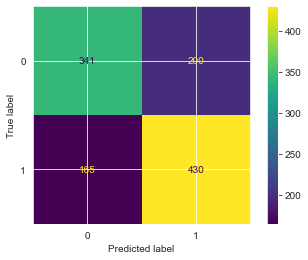

In [163]:
#Test het Preliminary Logistische Regressie model op basis van de validatieset en maakt een Confusion Matrix om de performance van het model te evalueren
plot_confusion_matrix(LRmodelv1, X_validLogRegvOne, y_validLogRegvOne)

In de onderstaande tabel zijn op basis van de Confusion Matrix een aantal berekeningen gemaakt: <br>

| Naam Berekening | Betekenis | Waarde |
| :---------: |---|---|
| Recall | Van alle machines met een failure, zie rij matrix met True label 1, hoeveel voorspellingen heeft het model gemaakt die correct zijn oftewel hoevaak zijn er failures voorspelt (zie rij matrix True label 1, Predicted label 1).| Van de $ 430 + 165 = 595 $ samples met failures heeft het model $ 430 $ samples correct geclassificeerd, oftewel $ (430/595) * 100\% = 72,27\% $ |
| Specificity | Van alle machines zonder een failure, zie rij matrix met True label 0, hoeveel voorspellingen heeft het model gemaakt die correct zijn oftewel hoevaak zijn er geen failures voorspelt (zie rij matrix True label 0, Predicted label 0). | Van de $ 341 + 200 = 541 $ samples met niet failures heeft het model $ 341 $ samples correct geclassificeerd, oftewel $ (341/541) * 100\% = 63,03\% $ |
| Accuracy | Van alle gemaakte voorspellingen, hoeveel correcte voorspellingen van niet failures en failures zijn er gemaakt. | Het percentage correcte voorspellingen van niet failures en failures op het totaal aantal gemaakte voorspellingen door het model is $ (430 + 341) / (430 + 341 + 165 + 200) * 100\% = 67,87\% $ |
|Precision|Het aantal correct voorspelde failures (positieve voorspellingen)|$(430)/(430+200) * 100\% = 68,25\%$|
| False Negative Rate/Miss Rate | Deze berekening is het tegenovergestelde van de Recall berekening. Van alle machines met een failure, zie rij matrix met True label 1, hoeveel voorspellingen heeft het model gemaakt die niet correct zijn oftewel hoevaak zijn er geen failures voorspelt (zie rij matrix True label 1, Predicted label 0). De waarde van deze berekening dient zo laag mogelijk te zijn aangezien deze voorspellingen grote gevolgen kunnen hebben. Binnen de huidige situatie betekent dit het voorspellen van geen failures terwijl de machines wel failures hebben. Hierdoor wordt het niet bekend dat onderhoud aan de machines benodigd is om uitval te voorkomen. | Van het totaal aantal samples met een failure is $ 165 / (165 + 430) = 0,2773 * 100\% = 27,73\% $ voorspelt als samples waar geen failure heeft opgetreden. |
| False Positive Rate/False Alarm Rate | Deze berekening is het tegenovergestelde van de Specificity berekening. Van alle machines zonder een failure, zie rij matrix met True label 0, hoeveel voorspellingen heeft het model gemaakt die niet correct zijn oftewel hoevaak zijn er failures voorspelt (zie rij matrix True label 0, Predicted label 1). De waarde van deze berekening dient ook zo laag mogelijk te zijn maar de voorspellingen hebben minder impact dan de False Negative Rate voorspellingen. In deze situatie wordt namelijk voorspelt dat machines failures hebben terwijl dit niet waar is. Dit betekent dat bijvoorbeeld een monteur onnodig op pad wordt gestuurd om onderhoud te plegen of dat er onnodig vervangende onderdelen worden besteld. | Van het totaal aantal samples met niet failures is $ 200 / (200 + 341) =  0,3697 * 100\% = 36,97\% $ voorspelt als samples waar wel een failure heeft opgetreden. |

Gesteld kan worden dat de Accuracy van het Preliminary Logistische Regressie model voldoende is aangezien deze boven de 50% en onder de 70% ligt, het betreft hier echter geen hele hoge score. Voor de Recall kan gesteld worden dat de score voldoende tot goed is en voor de Specificity kan gesteld worden dat de performance voldoende is. Opgemerkt mag worden dat de verdeling van het aantal correcte voorspellingen van niet failures en failures in balans is, deze is namelijk 63,03% en 72,27%. Het is dus bijvoorbeeld niet het geval dat het aantal correcte voorspellingen van niet failures vele malen hoger ligt dan het aantal correcte voorspellingen van failures. Aan het begin van dit hoofdstuk werd verwacht dat door het gebruik van het dataframe `dfSmall_oversampled` een balans verkregen werd in de verdeling van correcte voorspellingen. De observatie van deze balans ondersteunt deze verwachting.

Een mogelijke verklaring van de balans is dat het model tijdens het trainen ongeveer evenveel niet failure als failure samples heeft verkregen vanwege de nivellering. Hierdoor is er mogelijk een regressie vergelijking gevonden waarmee redelijke tot goede voorspellingen van niet failures en failures gemaakt kunnen worden. Wanneer een additioneel Logistisch Regressie model gerealiseerd zou worden op basis van een niet genivelleerde dataset wordt verwacht dat dit impact heeft op de regressie vergelijking die gevonden wordt waardoor de balans in deze verdeling van correcte voorspellingen afneemt en er een scheve verdeling ontstaat. Hierbij zal het aantal correct voorspelde niet failures hoger liggen dan het aantal correct voorspelde failures.

Naast de hierboven genoemde verklaring kunnen mogelijk ook de gebruikte features en hun combinatie een bijdrage leveren aan de balans en de performance van het model in het algemeen. Eventueel is het ook mogelijk dat de grotere hoeveelheid trainingdata heeft bijgedragen aan de performance in zijn algemeenheid.

## 5.3. Conclusie <a class="anchor" id="Chapter5.3"></a><br>
In dit hoofdstuk is een Preliminary Logistisch Regressie model getrained en getest dat op basis van de features Voltage, Rotation, Pressure, Vibration en Age voorspelt of bij een machine wel of geen failure optreedt. Het betreft hier een Preliminary model omdat deze gebruik maakt van de standaard ingestelde parameters binnen Sci-kit Learn. Het model is dan ook niet getuned.

Uit de evaluatie van het Preliminary Logistische Regressie model is gebleken dat het model een Accuracy van 67,87% heeft en dat deze voldoende is. Ook het correct aantal voorspelde Failures en Niet Failures zijn voldoende tot goed. Geconcludeerd kan worden dat het gebruik van de standaard ingestelde parameters heeft geleidt tot een model dat over het algemeen voldoende presteert. Mogelijke zaken die hebben bijgedragen aan de performance zijn de gebruikte features en de grotere hoeveelheid data beschikbaar voor het trainen van het model.

Tevens is gedurende de evaluatie van het model geconstateerd dat de verdeling van het aantal correct voorspelde Failures en Niet Failures in balans is. Een mogelijke verklaring hiervoor is de nivellering van het aantal Failures en Niet Failures in het dataframe dat gebruikt is. Hierdoor krijgt het model mogelijk tijdens het trainen ongeveer evenveel Niet Failure als Failure samples waardoor er mogelijk een regressie vergelijking gevonden is waarmee redelijke tot goede voorspellingen gemaakt kunnen worden. Deze verwachting is ook aan het begin van dit hoofdstuk gesteld. Geconcludeerd kan worden dat mogelijk het nivelleren van het aantal Failures en Niet Failures bijgedragen heeft aan een balans in de verdeling van het aantal correct voorspelde Failures en Niet Failures.

# 6. Support Vector Machine <a class="anchor" id="Chapter6"></a><br>
Dit hoofdstuk gaat in op het uitwerken van de Support Vector Machine. Het model wordt wederom op dezelfde manier gerealiseerd als de logistische regressie waarbij de features volt, rotation, pressure, vibration en age worden gebruikt voor het voorspellen van een failure van machines. Deze data is wederom afkomstig uit het dataframe dfSmall_oversampled en werd gekozen om de volgende redenenen:

+ In dit dataframe zijn het aantal voorkomende Failures en Niet Failures gelijk getrokken (genivelleerd) waardoor verwacht wordt dat het aantal correct geclassificeerde samples/voorspellingen van Failures en Niet Failures door het model in balans zal zijn.
+ Van de twee genivelleerde dataframes heeft dit dataframe het meeste aantal rijen data waardoor er meer data beschikbaar is om het model te trainen en te testen.
+ In het Logistische regressie model werd dezelfde dataframe gebruikt waardoor deze ook hier wordt gebruikt. Zo kunnen de modellen met elkaar vergeleken worden.

Het model wordt getraind op basis van de standaard parameters binnen de Suppor Vector Classifier (SVC) library van [Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Wederom wordt ook dit model niet geoptimaliseerd aangezien het van belang is eerst te kijken naar het best presterende model van de twee standaard modellen (logistische regressie en support vector machine), vervolgens wordt de best presterende hiervan verder uitgewerkt. Hiermee wordt het model dan ook het Preliminary Support Vector Machine model genoemd. Wanneer het Preliminary Support Vector Machine model is getraind wordt deze getest en vergeleken met het Preliminary Logistische Regressie Model om te kijken welke van deze twee beter presteert, vervolgens wordt de beste van deze verder uitgewerkt.

Het bouwen van het model gebeurt aan de hand van verschillende stappen die in de volgende paragrafen wordt toegelicht.


## 6.1. Predictive Modeling <a class="anchor" id="Chapter6.1"></a><br>
Deze paragraaf beschrijft de stappen voor het trainen van het Preliminary Support Vector Machine model toegelicht. Hierbij worden soortgelijke stappen doorlopen als in het eerste model. 

**Stap 1: Definiëren van de X-variabelen en de y-variabele**<br>
De eerste stap betreft wederom het definiëren van de X en y variabelen. Dit wordt op dezelfde wijze gedaan als bij het Preliminary Logistische Regressie Model. Hierbij staan de X-variabelen voor de features die gehanteerd worden bij het trainen van het model en de y variabele de target. Zoals eerder vermeld zullen de X variabelen (features) de volt, rotate, pressure, vibration en age kolom betreffen. De y-variabele (target) zal de failure kolom betreffen. Onderstaande codeblok met commentaar toont het selecteren van de kolommen als X en y. 

In [164]:
##Het selecteren van de volt, rotate, pressure, vibration, age vanuit de dfSmall_oversampled dataframe
XsvmVOne = dfSmall_oversampled[['volt', 'rotate', 'pressure', 'vibration', 'age']].copy()
##Het selecteren van de failure kolom vanuit de dfSmall_oversampled dataframe
ysvmVOne = dfSmall_oversampled['failure'].copy()

**Stap 2: Het splitsen van de data**<br>
Om het model te trainen en te testen is het van belang om de dataset samengesteld uit de voorgaande stap op te splitsen in verschillende subsets. Deze subsets betreffen de train en test dataset die middels de ```train_test_split``` methode worden opgesplitst. Iedere subset kent zijn eigen doel:

+ Training dataset: deze sub-dataset wordt gebruikt om het model te trainen. De training sub-dataset zal bestaan uit 70% van de dataset.
+ Validatie dataset: deze sub-dataset wordt gebruikt om het model te testen. Op basis van de test wordt de performance van het model geëvalueerd/beoordeeld. De validatie sub-dataset zal bestaan uit 30% van de dataset.

Het onderstaande codeblok voorzien van commentaar splitst de dataset op in twee subsets.

In [165]:
## Opsplitsen van de dataset naar een training en validatie sub-dataset
## De random state= 42 zorgt ervoor dat altijd hetzelfde resultaat (splitsing van de data) bereikt wordt. Dit is benodigd voor reproduceerbaarheid
X_trainsvmVOne, X_validsvmVOne, y_trainsvmVOne, y_validsvmVOne = train_test_split(XsvmVOne, ysvmVOne, train_size=0.7, test_size=0.3, random_state=42)

## Print de vorm van de sub-datasets (aantal rijen, aantal kolommen). Zo zijn er voor de X-variabelen in de trainingset 2650 rijen en 5 kolommen(== aantal features) aanwezig en voor de y-variabele ook 2650 rijen en 1 kolom.
print("(70%) De shape van de trainingset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure)", "\n", X_trainsvmVOne.shape, y_trainsvmVOne.shape)
print("(30%) De shape van de validatieset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure)", "\n", X_validsvmVOne.shape, y_validsvmVOne.shape)

(70%) De shape van de trainingset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure) 
 (2650, 5) (2650,)
(30%) De shape van de validatieset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure) 
 (1136, 5) (1136,)


**Stap 3: Het trainen van het Preliminary Support Vector Machine model**<br>
De derde stap betreft het trainen van het preliminary support vector machine model. Een Support Vector Machine algoritme kan gebruikt worden bij zowel classificatie als regressie vraagstukken. In het geval van het onderzoek heeft men te maken met een classificatie vraagstuk, en wordt het Support Vector Machine model benoemd als Support Vector Classifier (SVC). Het classificeren van de groepen (failures en non-failures) wordt bereikt doordat SVM op zoek gaat naar een *Optimal Hyperplane*. Een optimal hyperplane betreft de ideale grens waarmee groepen van elkaar gescheiden kunnen worden en waardoor vervolgens besloten kan worden tot welke groep een sample behoort. Een optimal Hyperplane kan zo gezien worden als een optimale "beslissingsgrens". *[Support Vector Machine - Simply Explained, Lilly Chen](https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496) en Data Science Week 7 - Hoorcollege, Zuyd Hogeschool*. Onderstaande afbeelding toont een visueel voorbeeld van een Support Vector Machine met de onderdelen. Vervolgens worden de onderdelen in de onderstaande tabel toegelicht. 

<img src='img/SVM_Example.png' width=300></img>

|Onderdeel|Omschrijving|
|---|---|
|Optimal Hyperplane|De ideale lijn die wordt gevonden om samples te kunnen scheiden tussen groepen|
|Maximised Margin|De uiterlijke margin die wordt gezien als grenswaarde voor de groepen. Beide groepen kennen een grenslijn en de ruimte hiertussen wordt de margin genoemd. Wanneer men een zogeheten *soft margin* toekent worden outliers sneller geaccepteerd, wanneer dit een *hard margin* betreft worden outliers niet snel geaccepteerd en is het model gevoelig voor outliers.|
|Support Vector|Samples (metingen) die de grenzen voor de margin bepalen. Dit zijn de metingen die *op* de lijn liggen en hierdoor herkent kunnen worden.|

Tot slot werkt een Support Vector Machine met dimensies en is het mogelijk een zogeheten kernel trick toe te passen. De truck hierbij is het in hogere dimensies plaatsen van de metingen door een kernel toe te passen. Zo is het mogelijk voor de Support Vector Machine een duidelijkere scheiding te maken tussen de punten om zo tot een duidelijkere margin te komen. 

Meer informatie over kernels is te vinden op de site van [TechVidVan](https://techvidvan.com/tutorials/svm-kernel-functions/#:~:text=A%20kernel%20is%20a%20function,number%20of%20dimensions%20using%20kernels.).

Onderstaande codeblok toont het trainen van het model op basis van de eerder gedefinieerd X en y datasets.

In [166]:
##Creërt het Preliminary SVM model en traint het model op basis van de training subset.
##Random_state=42 voor reproduceerbaarheid
svmVOne = SVC(random_state=42)
##Het trainen van het model door de y op de X te fitten (trainen)
svmVOne.fit(XsvmVOne, ysvmVOne)
##Het printen van de gehanteerde standaard parameters
print("Standaard parameters SVM Model:", svmVOne.get_params())

Standaard parameters SVM Model: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## 6.2. Output en evaluatie <a class="anchor" id="Chapter6.2"></a><br>

**Stap 4: Evalueren van het Preliminary Support Vector Machine**<br>
Wanneer het model getraind is, is het wederom mogelijk het model te evalueren aan de hand van de eerder opgesplitste testset. Dit betreft een dataset van 30% van de gehele dataframe dfSmall_oversampled. De testset wordt echter alleen gebruikt voor het evalueren van het preliminary Support Vector Machine model, waarna het preliminary model af is, wordt deze zoals eerder vermeld later vergeleken met het Preliminary Logistic Regression model. 

Het evalueren gebeurt door gebruik te maken van een confusion matrix. Waarna deze geplot wordt (zie onderstaade codeblok) is het mogelijk de Accuracy, precision, Recall en sensitivity te berekenen. 

D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


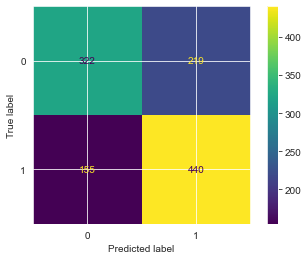

In [167]:
#Test het Preliminary SVM model op basis van de validatie sub-set en genereert een Confusion Matrix
plot_confusion_matrix(svmVOne, X_validsvmVOne, y_validsvmVOne)

Onderstaande tabel toont de berekening van de kentallen Accuracy, Precision, Recall en Specificity.

|Kental|Formule|Berekening|Waarde| 
|---|:---:|---|---|
|Accuracy|$\dfrac{TP+TN}{TP+TN+FP+FN}$|$(440+322)/(440+322+155+219)$|0,671|
|Precision|$\dfrac{TP}{TP+FP}$|$(440)/(440+219)$|0,668|
|Recall/Sensitivity|$\dfrac{TP}{TP+FN}$|$(440)/(440+155)$|0,739|
|Specificity|$\dfrac{TN}{TN+FP}$|$(322)/(322+219)$|0,595|
|False Negative Rate/Miss rate|$\dfrac{FN}{FN+TP}$|$(155)/(155+440)$|0,260|
|False Positive Rate/Fall-out|$\dfrac{FP}{FP+TN}$|$(219)/(219+322)$|0,405|

**Stap 5: Evaluatie preliminary Support Vector Machine model**<br>
Bovenstaande kentallen tonen verschillende waardes. Hierbij dient in gedachten gehouden te worden dat de miss rate en de fall-out rate zo laag mogelijk dienen te zijn aangezien dit de tegenhangers zijn van de *goede voorspellingen*. Dit betekent dat de Miss Rate met een percentage van 26% vrij goed is maar de fall-out rate richting de 50% gaat (wat betekent dat de andere helft afneemt). De Miss rate betreft de tegenhanger van de recall/sensitivity en de fall-out range betreft de tegenhanger van de specificity. Zo zouden deze ook berekent kunnen worden als: 

+ False Negative Rate = 1-recall
+ False Positive Rate = 1-specificity

Hiernaast dienen de Accuracy, Precision, Recall en Specificity zo hoog mogelijk te zijn. Echter, wanneer deze 100% (1) zijn is dit verdacht. Tevens is het een goed teken dat de waardes relatief dicht op elkaar liggen. Dit betekent ook dat er voldoende nieuwe data was om voorspellingen te maken aangezien er geen grote verschillen ontstaan in de voorspelde waardes. 

Met een Accuracy van 67,1%, Precision van 66,8%, Recall van 73,9% en een Specificity van 59,5% valt niet direct te zeggen of het model geoptimaliseerd is en de standaard parameters juist heeft toegepast. Dit moet blijken uit de algehele vergelijking tussen de twee preliminary modellen (logistic regression als support vector machines) wat terug te lezen in het volgende hoofdstuk. 

# 7. Vergelijking Preliminary modellen <a class="anchor" id="Chapter7"></a><br>
Dit hoofdstuk gaat in op het vergelijken van de eerder opgestelde Preliminary Machine Learning modellen (logistic regression en Support Vector Machine). Hierbij wordt eerst naar de model specifieke validatiesets gekeken (die zijn opgesplitst gedurende het trainen van de specifieke modellen) waarna vervolgens de in hoofdstuk 3 gedefinieerde dfSmall_oversampled_test dataframe als testset wordt gehanteerd. Dit wordt zo gezien als compleet nieuwe data die door beiden modellen wordt gevoerd om uiteindelijk tot een conclusie te komen welk model verder uitgewerkt zal worden. 

## 7.1. Vergelijking Preliminary modellen op basis van model specifieke validatiesets <a class="anchor" id="Chapter7.1"></a><br>
Om een tijdelijke conclusie te trekken betreffende het beter presterende model is het mogelijk de scores van beide preliminary modellen naast elkaar te leggen. Aangezien deze op dezelfde wijze zijn getraind met de standaard parameters wordt het inzichtelijk gemaakt welk model er in eerste instantie het beste presteert (getest op de specifieke validatie sets wat een totaal van 30% van de gedefinieerde dataframe dfSmall_oversampled betreft). Onderstaande tabel toont een overzicht van de scores per model samen met een overzicht omtrent het best presterende model op basis van de kentallen binnen classificatie (accuracy, recall, etc.). Hierbij is het van belang dat onthouden wordt dat deze validaties zijn gebeurd op een random train_test_split binnen het dfSmall_oversampled dataframe.

|Kental|Waarde Preliminary Logistic Regression|Waarde Preliminary SVM|Beter presterend model|
|---|:---:|:---:|---|
|Accuracy|67,87%|67,1%|Logistic Regression|
|Recall/Sensitivity|72,27%|73,9%|Support Vector Machine|
|Specificity|63,03%|59,5%|Logistic Regression|
|Precision|68,25%|66,8%|Logistic Regression|
|False Negative Rate/Miss Rate|27,73%|26%|Logistic Regression|
|False Positive Rate/False Alarm Rate|36,97%|40,5%|Support Vector Machine|

Uit bovenstaande tabel blijkt dat de logistische regressie in eerste instantie beter scoort, om dit te bevestigen (of juist te ontkrachten) wordt de eerder gedefinieerde dataframe dfSmall_oversampled_test vanaf dit punt als testset gehanteerd. Deze test set wordt door beide modellen gevoerd om te kijken welk model nu beter presteert. Dit gebeurt in onderstaande code waarna vervolgens een evaluatie over beiden wordt gedaan. Deze evaluatie wordt ook wel de conclusie (omtrent het beter presterend model) genoemd.

## 7.2. Vergelijking Preliminary modellen op basis van generieke dfSmall_oversampled_test set <a class="anchor" id="Chapter7.2"></a><br>
Zoals bovenstaand genoemd werd voorheen een vergelijking gedaan van de modellen waarbij ieder model een andere samenstelling van de validatieset had. Ze hadden beiden wel een totaal van 30% van de rijen erin zitten maar niet *exact* dezelfde rijen. Om zo een algehele conclusie te kunnen doen omtrent het beter presterend model wordt de in hoofdstuk 3 gedefinieerde dfSmall_oversampled_test door de getrainde modellen heen gevoerd en geëvalueerd op dezelfde wijze als voorheen (door gebruik van de confusion matrix). 

**Stap 1: Opnieuw definieren van de X en y variabele uit het dataframe dfSmall_oversampled_test** <br>
De eerste stap hierbij is wederom de X en y definiëren voor de dfSmall_oversampled_test dataframe. Dit is terug te zien in onderstaande codeblok waarbij op dezelfde wijze X en y worden gedefinieerd. Deze eerste stap betreft een generieke stap die voor zowel het Preliminary Logistic Regression model als het Preliminary Support Vector Machine model geldt.

In [168]:
##Het opnieuw selecteren van een X en y variabele, dit maal uit het dataframe dfSmall_oversampled_test
##Het selecteren van de volt, rotate, pressure, vibration, age vanuit de dfSmall_oversampled_test dataframe en het plaatsen in een nieuwe X variabele
XGeneralTest = dfSmall_oversampled_test[['volt', 'rotate', 'pressure', 'vibration', 'age']].copy()
##Het selecteren van de failure kolom vanuit de dfSmall_oversampled_test dataframe en het plaatsen in een nieuwe y variabele
yGeneralTest = dfSmall_oversampled_test['failure'].copy()

**Stap 2: Het plotten van een confusion matrix voor het Preliminary Logistic Regression model**<br>
Onderstaande code toont het plotten van een confusion matrix van de nieuwe voorspellingen gemaakt door het Preliminary Logistic Regression model op basis van de dataframe dfSmall_oversampled_test.

D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


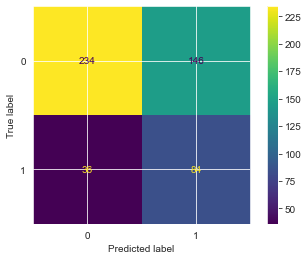

In [169]:
plot_confusion_matrix(LRmodelv1, XGeneralTest, yGeneralTest)

**Stap 3: Het plotten van een confusion matrix voor het Preliminary Support Vector Machine model**<br>
Onderstaande code toont het plotten van een confusion matrix van de nieuwe voorspellingen gemaakt door het Preliminary Support Vector Machine model op basis van de dataframe dfSmall_oversampled_test.

D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


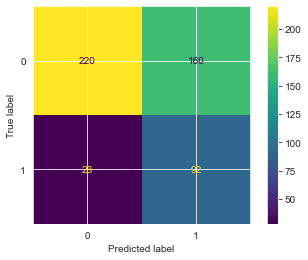

In [170]:
plot_confusion_matrix(svmVOne, XGeneralTest, yGeneralTest)

**Stap 4: Het berekenen van kentallen en opnieuw evalueren beter presterend model**<br>
De laatste stap voordat het mogelijk is om een conclusie te trekken omtrent het beter presterend model is het opnieuw evalueren van de kentallen van beide preliminary modellen, dit maal zoals beschreven op basis van een losse test dataset die gedurende het voorproces nog niet door de modellen was 'gezien' (geheel nieuwe data betreft). Beide preliminary modellen hebben zo een voorspelling gedaan over deze data en op dit punt wordt het mogelijk gemaakt een conclusie te trekken over welk model het beste presteert. De uiteindelijke waarden zijn terug te zien in onderstaande tabel

|Kental|Formule|Berekening Preliminary Logistic Regression Model|Berekening Preliminary Support Vector Machine|Waarde Logistic Regression|Waarde Support Vector Machine|Best presterend model|
|---|:---:|---|---|:---:|---|:---:|
|Accuracy|$\dfrac{TP+TN}{TP+TN+FP+FN}$|$(84+234)/(84+234+146+36)$|$(92+220)/(92+220+160+28)$|63,60%|62,4%|Logistic Regression|
|Recall/Sensitivity|$\dfrac{TP}{TP+FN}$|$(84)/(84+36)$|$(92)/(92+28)$|70%|76,7%|Support Vector Machine|
|Specificity|$\dfrac{TN}{TN+FP}$|$(234)/(234+146)$|$(220)/(220+160)$|61,58%|57,89%|Logistic Regression|
|Precision|$\dfrac{TP}{TP+FP}$|$(84)/(84+146)$|$(92)/(92+160)$|36,52%|36,51%|Logistic Regression|
|False Negative Rate/Miss Rate|$\dfrac{FN}{FN+TP}$|$(36)/(36+84)$|$(28)/(28+92)$|30%|23,3%|Support Vector Machine|
|False Positive Rate/False Alarm Rate|$\dfrac{FP}{FP+TN}$|$(146)/(146+234)$|$(160)/(160+220)$|38,42%|42,11%|Logistic Regression|

## 7.3. Conclusie best presterend Preliminary Model <a class="anchor" id="Chapter7.3"></a><br>
Op basis van een zestal kentallen voor het evalueren van de modellen blijkt dat logistic regression op 4 van de 6 kentallen beter scoort. Dit betreffen de Accuracy, Specificity, Precision en False Alarm Rate, hiermee kan geconcludeerd worden dat het Preliminary Logistic Regression Model beter presteert. Op basis van deze conclusie zal het preliminary logistische regressie model verder uitgewerkt worden waarbij de *hyper parameters* getuned zullen worden. Hyper parameters betreffen de parameters die meegegeven kunnen worden bij het trainen van het logistische regressie model. Vanaf het volgende hoofdstuk wordt dit model verder uitgewerkt om deze te optimaliseren. Hierbij is het van belang dat deze vanaf de grond af wordt opgebouwd. 

# 8. Optimaal trainen logistisch regressie model <a class="anchor" id="Chapter8"></a><br>
Dit hoofdstuk gaat in op het optimaliseren van het preliminary logistische regressiemodel (wat uit de voorgaande hoofdstukken het beter presterend model is gebleken). Het model wordt opnieuw opgebouwd zoals bekend. Echter, worden er nu hyper parameters meegegeven die eerst gedefinieerd dienen te worden. Een overzicht van deze hyperparameters die allen aangepast kunnen worden is te vinden op de [website van Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Wederom wordt het model opgebouwd volgens bekende stappen. Echter worden deze ditmaal in dit hoofdstuk verder uitgewerkt en opgesplitst zoals gewend met als doel tot een geoptimaliseerd model te komen dat rust op een gefundeerde methode voor het vinden van de optimale parameters. Vanaf onderstaande paragraaf worden de features en target gedefinieerd, de dataset opgesplitst, het model getraind, geëvalueerd en getest. Tot slot sluit het hoofdstuk af met een conclusie waarbij terug gekeken wordt op het geoptimaliseerde logistische regressie model.

Het logistische regressie model wordt op basis van het dfSmall_oversampled dataframe opgebouwd. Dit met als reden omdat dit bij de preliminary modellen ook is gedaan en het dataframe berust op gefundeerde methodieken voor het invullen van lege waardes (het SMOTE algoritme). Tot slot was het een eis vanuit de opdrachtgever om te gaan werken met een grotere dataset dan de eerder gedefinieerde dfSmall_encoded.

## 8.1. Predictive Modeling <a class="anchor" id="Chapter8.1"></a><br>
Deze paragraaf beschrijft het trainen van het uiteindelijke logistische regressiemodel waarbij de hyperparameters getuned zullen worden. Hierbij worden dezelfde voorgaande stappen zoals gewend doorlopen. Echter komt er op het moment dat het model getraind wordt een aanzienlijk verschil naar boven waarbij gezocht en gebruik gemaakt wordt van de ideale hyperparameters. 

**Stap 1: Definiëren van de X-variabelen en de y-variabele**<br>
Zoals voorheen gezien is de eerste stap van het trainen van het model het opsplitsen van X en y variabelen vanuit het dataframe. Hierbij worden dezelfde onafhankelijke variabelen (features) geselecteerd als bij de voorgaande preliminary modellen. Ook de target zal wederom de kolom failure betreffen gezien het doel van het onderzoek. Onderstaande codeblok, voorzien van commentaar toont het selecteren van de X en y variabelen (features en target).

In [171]:
##Het selecteren van de volt, rotate, pressure, vibration, age vanuit de dfSmall_oversampled dataframe
XLogRegvTwo = dfSmall_oversampled[['volt', 'rotate', 'pressure', 'vibration', 'age']].copy()
##Het selecteren van de failure kolom vanuit de dfSmall_oversampled dataframe
yLogRegvTwo = dfSmall_oversampled['failure'].copy()

**Stap 2: Het splitsen van de dataset**<br>
Wederom is het van belang de dataset op te splitsen in twee subsets. Deze subsets betreffen de train en test dataset die middels de ```train_test_split``` methode worden opgesplitst. Iedere subset kent zijn eigen doel:

+ Training dataset: deze sub-dataset wordt gebruikt om het model te trainen. De training sub-dataset zal bestaan uit 70% van de dataset.
+ Validatie dataset: deze sub-dataset wordt gebruikt om het model te testen. Op basis van de test wordt de performance van het model geëvalueerd/beoordeeld. De validatie sub-dataset zal bestaan uit 30% van de dataset.

Het onderstaande codeblok voorzien van commentaar splitst de dataset op in twee subsets.

In [172]:
## Opsplitsen van de dataset naar een training en validatie sub-dataset
## De random state= 42 zorgt ervoor dat altijd hetzelfde resultaat (splitsing van de data) bereikt wordt. Dit is benodigd voor reproduceerbaarheid
X_trainLogRegvTwo, X_validLogRegvTwo, y_trainLogRegvTwo, y_validLogRegvTwo = train_test_split(XLogRegvTwo, yLogRegvTwo, train_size=0.7, test_size=0.3, random_state=42)

##Het uitprinten van het aantal kolommen en rijen voor de X en y variabelen
print("(70%) De shape van de trainingset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure)", "\n", X_trainLogRegvTwo.shape, y_trainLogRegvTwo.shape)
print("(30%) De shape van de validatieset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure)", "\n", X_validLogRegvTwo.shape, y_validLogRegvTwo.shape)

(70%) De shape van de trainingset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure) 
 (2650, 5) (2650,)
(30%) De shape van de validatieset (X-variabele Voltage, Rotation, Pressure, Vibration, Age & y-variabele Failure) 
 (1136, 5) (1136,)


**Stap 3: Het vinden van de optimale parameters**<br>
De derde stap betreft het vinden van de optimale parameters. Dit gebeurd op basis van verschillende stappen waarbij de optimale parameters als eerst worden toegevoegd in een zogeheten parameter grid. Deze parameters worden tegen de eerste versie van het logistische regressie model aangehouden om te komen tot een set van ideale parameters. 

**Stap 3.1. Opstellen parameter grid**<br>
Onderstaande codeblok stelt een variabele param_grid op waarin verschillende opties voor de optimale parameters worden meegegeven. Dit betreft de eerste deelstap voor het vinden van de optimale parameters.

In [173]:
# np.logspace
param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
     'C': (4, 4, 20, 1.0),
     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter': [100, 1000, 2500, 5000]
     }
] 

**Stap 3.2. Vinden optimale parameters in param_grid middels gridSearchCV**<br>
De tweede deelstap betreft het vinden van de optimale parameters vanuit de param_grid variabele op basis van een gridsearchCV. Hiervoor is het van belang dat de library wordt geïmporteerd wat bovenin dit document verwezenlijkt wordt middels de regel code ```from sklearn.model_selection import GridSearchCV```. Vervolgens is het mogelijk om de logistic regression methode aan te roepen. [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) maakt tevens weer gebruik van een aantal parameters die invloed hebben op o.a. de snelheid van het vinden van de optimale parameters en de informatie die de methode terug geeft. 

In [174]:
##Aanroepen van GridSearchCV inclusief het meegeven van parameters.
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv=5, verbose=True, scoring='accuracy', n_jobs=-1)

**Stap 3.3. Het trainen van X en y op de optimale parameters**<br>
De derde stap voor het vinden van de optimale parameters is het trainen van X en y op de clf variabele (gridSearchCV methode). Hierbij wordt gebruik gemaakt van de X_trainLogRegvTwo en y_trainLogRegvTwo aangezien het van belang is dat niet de gehele dataset wordt gehanteerd (hiermee zou namelijk het doel van train_test_split in het teniet gedaan worden zoals omschreven op [dit forum](https://stackoverflow.com/questions/53449337/fitting-sklearn-gridsearchcv-model)). Na het trainen zal de uitkomst een reeks aan optimale parameters zijn gebaseerd op de gridsearchCV. Wanneer deze zijn gevonden kan het optimale logistic regression model gebouwd worden aan de hand van de optimale parameters. 

In [175]:
best_param_train = clf.fit(X_trainLogRegvTwo, y_trainLogRegvTwo)
print("Optimale parameters voor het Logistic Regression model: ", best_param_train.best_params_)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Optimale parameters voor het Logistic Regression model:  {'C': 4, 'max_iter': 2500, 'penalty': 'l1', 'solver': 'liblinear'}


D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site

**Stap 4: Het trainen van het Logistische Regressie model op basis van de optimale parameters**<br>  
Zoals uit stap 3.3. is gebleken zijn er een aantal optimale parameters naar voor gekomen. Deze optimale parameters kunnen nu meegegeven worden bij het trainen van een nieuw logistisch regressie model. Vervolgens is het mogelijk de gevonden regressievergelijking te reconstrueren.

In [176]:
## Het trainen van het logistisch regressie model op basis van de optimale parameters met een random state=42 voor reproduceerbaarheid en de gevonden optimale parameters
LRmodelv2 = LogisticRegression(random_state=42, C=1.0, max_iter=100, penalty='l1', solver='liblinear')

#Traint het Logistische Regressie model op basis van de training sub-dataset
LRmodelv2.fit(X_trainLogRegvTwo, y_trainLogRegvTwo)

#Verkrijgt de intercept en regressie coëfficiënten van de gevonden regressie vergelijking
print("Intercept:", LRmodelv2.intercept_[0])
print("------------------------------")
print(pd.DataFrame({"Coëfficiënt:": LRmodelv2.coef_[0]}, index=X_trainLogRegvTwo.columns).transpose())

Intercept: -6.7304129247335185
------------------------------
                  volt    rotate  pressure  vibration       age
Coëfficiënt:  0.023963 -0.010199  0.032955    0.07957  0.036229


Onderstaande is de gevonden regressie vergelijking weergegeven. Merk op dat ook hier de regressie coëfficiënt van de feature Rotation een negatieve waarde betreft. <br> <br>

$$Log\big(\frac{P(Failure)}{1 - P(Failure)}\big) = -6.73 + 0.024 * Voltage - 0.010 * Rotation + 0.033 * Pressure + 0.079 * Vibration + 0.036 * Age$$

## 8.2. Output en evaluatie optimale logistische regressie model <a class="anchor" id="Chapter8.2"></a><br>
Deze paragraaf gaat in op de output en evaluatie van het getrainde optimale logistische regressie model. Hierbij wordt eerst specifiek alleen dit nieuwe model geëvalueerd waarna vervolgens deze met het Preliminary Logistic Regression model vergeleken wordt. Hierbij wordt bij de specifieke evaluatie van alleen het geoptimaliseerde model gebruik gemaakt van de gesplitste validatie set, waar dit model vergeleken wordt met de Preliminary wordt de in hoofdstuk 3 gedefinieerde dataset dfSmall_oversampled_test gehanteerd. 

Het onderstaande codeblok toont de confusion matrix op basis van het nieuwe model waarbij de validatie dataset wordt gehanteerd. 

D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


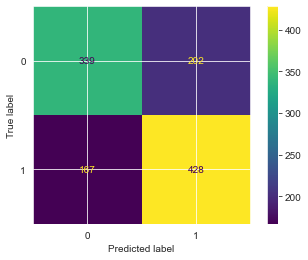

In [177]:
##Het plotten van een confusion matrix voor het nieuwe geoptimaliseerde logistische regressie model
plot_confusion_matrix(LRmodelv2, X_validLogRegvTwo, y_validLogRegvTwo)

Onderstaande tabel toont de berekende kentallen zoals bekend voor het geoptimaliseerde logistische regressie model. 

|Kental|Formule|Berekening|Waarde| 
|---|:---:|---|---|
|Accuracy|$\dfrac{TP+TN}{TP+TN+FP+FN}$|$(428+339)/(428+339+167+202)$|67,52%|
|Precision|$\dfrac{TP}{TP+FP}$|$(428)/(428+202)$|67,94%|
|Recall/Sensitivity|$\dfrac{TP}{TP+FN}$|$(428)/(428+167)$|71,93%|
|Specificity|$\dfrac{TN}{TN+FP}$|$(339)/(339+202)$|62,66%|
|False Negative Rate/Miss rate|$\dfrac{FN}{FN+TP}$|$(167)/(167+428)$|28,07%|
|False Positive Rate/Fall-out|$\dfrac{FP}{FP+TN}$|$(202)/(202+339)$|37,34%|

**Stap 5: Evaluatie geoptimaliseerde logistische regressie model**<br>
Uit bovenstaande tabel worden de bekende kentallen duidelijk en de score van het optimale model in kaart gebracht. Echter wordt dit op basis van de validatie set gedaan en is het voor alsnog niet mogelijk deze te evalueren richting het Preliminary Logistic Regression Model. Om deze reden wordt er in de volgende paragraaf gereflecteerd op beide logistische regressie modellen om te bepalen of het model beter is gaan presteren ja/nee waarbij het in hoofdstuk 3 gedefinieerde dataframe dfSmall_oversampled_test aan bod komt om het geoptimaliseerde logistische regressie model af te zetten tegen het preliminary logistische regressie model. 


## 8.3. Output en evaluatie optimale logistische regressie model op basis van dfSmall_oversampled_test <a class="anchor" id="Chapter8.3"></a><br>
Zoals eerder vermeld is het op dit punt belangrijk om het dataframe dfSmall_oversampled_test te hanteren om opnieuw voorspellingen te kunnen maken vanuit het geoptimaliseerde model. Ook hier wordt er wederom een confusion matrix gehanteerd om te evalueren hoe goed het model heeft gepresteerd. Deze waardes kunnen vervolgens vergeleken worden met het preliminary Logistic Regression model waarbij ook met dezelfde test dataframe is gewerkt. Hierbij wordt er gebruik gemaakt van de eerder gedefinieerde XGeneralTest en yGeneralTest variabelen. Dit betreffen exact dezelfde waarden zoals deze zijn gehanteerd in het evalueren van de preliminary modellen onderling. 

**Stap 1: Het plotten van een confusion matrix voor het geoptimaliseerde Logistic Regression Model**<br>
Aangezien in een eerder stadium van het onderzoek de confusion matrix voor het Preliminary Logistic Regression model reeds is geplot, is het alleen van belang om deze te plotten voor het geoptimaliseerde model. Op dit punt zal het geoptimaliseerde model voorspellingen gaan maken op basis van het dataframe dfSmall_oversampled_test. Onderstaande code toont het plotten van de confusion matrix. 

D:\01_Sander\03_Programmas\Serious shit\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


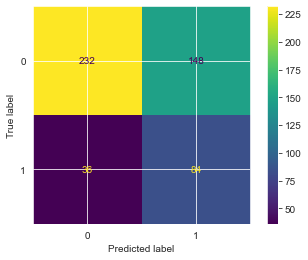

In [178]:
plot_confusion_matrix(LRmodelv2, XGeneralTest, yGeneralTest)

**Stap 2: Het berekenen van kentallen en reflecteren geoptimaliseerde logistische regressie model**<br>
De laatste stap is het berekenen van de kentallen en reflecteren hiervan voor het Preliminary Logistic Regression Model en het geoptimaliseerde logistic regression model. 

|Kental|Formule|Berekening Preliminary L.R. Model|Berekening Geoptimaliseerde L.R. Model|Waarde Preliminary L.R. model|Waarde geoptimaliseerde L.R. model|Best presterende model|
|---|:---:|---|---|---|---|:---:|
|Accuracy|$\dfrac{TP+TN}{TP+TN+FP+FN}$|$(84+234)/(84+234+146+36)$|$(84+232)/(84+232+36+148)$|63,60%|63,2%|Preliminary|
|Recall/Sensitivity|$\dfrac{TP}{TP+FN}$|$(84)/(84+36)$|$(84)/(84+36)$|70%|70%|-|
|Specificity|$\dfrac{TN}{TN+FP}$|$(234)/(234+146)$|$(232)/(232+148)$|61,58%|61,05%|Preliminary|
|Precision|$\dfrac{TP}{TP+FP}$|$(84)/(84+146)$|$(84)/(84+148)$|36,52%|36,21%|Preliminary|
|False Negative Rate/Miss Rate|$\dfrac{FN}{FN+TP}$|$(36)/(36+84)$|$(36)/(36+84)$|30%|30%|-|
|False Positive Rate/False Alarm Rate|$\dfrac{FP}{FP+TN}$|$(146)/(146+234)$|$(148)/(148+232)$|38,42%|38,95%|Preliminary|

## 8.4. Conclusie vergelijking preliminary L.R. model en geoptimaliseerd L.R. model <a class="anchor" id="Chapter8.4"></a><br>
Uit de voorgaande paragraaf blijkt dat het preliminary logistische regressie model beter presteert ten opzichte van het geoptimaliseerde model wanneer de dfSmall_oversampled_test wordt gebruikt bij het testen van het model. Echter zijn de verschillen nihil. Wel heeft het optimaliseren averechts gewerkt en heeft het geleid tot het slechter kunnen maken van voorspellingen door het model. Hierbij dienen enkel een aantal zaken vermeld te worden die mogelijk in vervolg onderzoek opgepakt zouden kunnen worden:

+ Het optimaliseren van parameters leidt normaliter tot verbeterde resultaten, in de toekomst is het zo mogelijk met meer parameters te gaan experimenteren.
+ Het geheel focussen op logistische regressie kan er tot leiden dat meer kennis leidt tot het beter trainen van de modellen.

Wanneer bovenstaande gevallen niet zo blijken te zijn kan er, evenals in dit onderzoek geconcludeerd worden dat het model met de standaard (default) parameters het beste presteert en wellicht aangenomen worden dat een model *niet altijd geoptimaliseerd zou hoeven worden*. 

Met deze conclusie omtrent het optimaliseren van modellen wordt het trainen van de modellen afgesloten evenals het onderzoek in het geheel. In de volgende twee hoofdstukken wordt de gehele conclusie beschreven waarna vervolgens op de tekortkomingen van het onderzoek wordt in gegaan (discussie).

# 9. Eindconclusie <a class="anchor" id="Chapter9"></a><br>
Gedurende dit project is machine learning ingezet om het wel of niet optreden van Failures (storingen) bij machines te voorspellen op basis van data. Deze voorspellingen maken het mogelijk om tijdig onderhoud aan de juiste machines uit te voeren waardoor failures voorkomen kunnen worden en de bruikbare levensduur van de betreffende machines gemaximaliseerd kan worden. Dit fenomeen wordt ook wel Predictive Maintenance genoemd.

Het inzetten van Predictive Maintenance kan voor organisaties raadzaam zijn omdat ongeplande downtime (mogelijk) schadelijk is. Ongeplande downtime kan bijvoorbeeld leiden tot verstoorde processen en financiële schade. Doormiddel van Predictive Maintenance kunnen organisaties de levensduur van hun apparatuur maximaliseren en ongeplande downtime en (vaak duur) onderhoud als gevolg minimaliseren.

Het doel van dit project betrof het realiseren van een data pipeline waarin ruwe data omtrent operationele gegevens, onderhoudsgegevens en storingsgegevens van machines verwerkt werd en vervolgens door een machine learning predictiemodel gebruikt werd om voorspellingen te maken over het wel of niet optreden van Failures bij machines.

Om het projectdoel te bereiken is een hoofdonderzoeksvraag opgesteld, deze luidt als volgt: “hoe kunnen machine learning algoritmen toegepast worden op een Predictive Maintenance dataset om voorspellingen te maken over (mogelijke) toekomstige defecten bij machines?”. Om antwoord te geven op deze hoofdvraag zijn een tweetal deelvragen opgesteld.

Voor het beantwoorden van de eerste deelvraag “hoe kan de dataset zodanig geprepareerd worden zodat de voorspellende modellen hiervan gebruik kunnen maken?” is de gebruikte data in dit project bewerkt en verwerkt (Data Pre-processing) alvorens deze gebruikt werd door een predictiemodel. De ruwe dataset was van origine opgesplitst in vijf verschillende CSV (Comma Separated Values) bestanden. De eerste stap binnen het Data Pre-processing proces was het samenvoegen van deze vijf CSV-bestanden tot één zogenoemd dataframe (dataset). Het samenvoegen van de bestanden is uitgevoerd aan de hand van de regels van SQL Joins waarmee tabellen (vergelijkbaar met data in een CSV-bestand) in een database samengevoegd worden tot één tabel. Vanuit dit samengevoegd dataframe zijn verschillende dataframes gerealiseerd die gebruikt kunnen worden door een predictiemodel en die allen verschillende eigenschappen hebben. Om te komen tot de dataframes zijn ook verscheidene bewerkingen uitgevoerd op de data.

Op basis van de uitgevoerde Pre-processing kan gesteld worden dat het voor iedere dataset verschilt op welke wijze deze geprepareerd dient te worden zodat een predictiemodel hiervan gebruik kan maken. Het prepareren is namelijk van verschillende zaken afhankelijk zoals de betekenis en eigenschappen van de data maar ook de (soorten) voorspellingen die gemaakt zullen worden. De huidige gerealiseerde data pipeline maakt het dus mogelijk om nieuwe versies van de CSV-bestanden met aangevulde data en dezelfde structuur als de eerder gebruikte CSV-bestanden in te laden en automatisch te prepareren. Echter, zodra bijvoorbeeld één of meerdere kolommen toegevoegd zijn aan de CSV-bestanden dient het Pre-processing proces aangepast te worden en is automatische preparatie van de data niet meer mogelijk.

De tweede deelvraag luidt “welke machine learning algoritmen kunnen gebruikt worden voor het voorspellen van (mogelijke) toekomstige defecten bij machines?”. Binnen dit project zijn een tweetal machine learning algoritmen gebruikt voor het voorspellen van het wel of niet optreden van Failures bij machines. Het betreft hier het Support Vector Machines en het Logistische Regressie algoritme. Deze algoritmen zijn enerzijds geselecteerd omdat zij classificatie voorspellingen kunnen maken en anderzijds vanwege de gemaakte overwegingen tussen de bekende algoritmen voor de onderzoekers. Gekozen is voor classificatie algoritmes omdat bij het maken van classificatie voorspellingen een staat/klasse wordt voorspeld, in dit geval een Failure die wel of niet optreedt bij een machine. Er bestaan dan ook meerdere classificatie algoritmen om voorspellingen te maken over het wel of niet optreden van Failures. Voorbeelden hiervan zijn Decision Trees, Random Forest en Neural Networks.

Gesteld kan worden dat het in zijn algemeenheid mogelijk is om verschillende machine learning algoritmen toe te passen voor een willekeurig vraagstuk, in dit geval ook het maken van voorspellingen over toekomstige defecten bij machines. Deze mogelijkheid is aanwezig zolang algoritmen gekozen worden die geschikt zijn voor het oplossen van het vraagstuk en de te gebruiken data geprepareerd wordt voor het doel dat men voor ogen heeft.

Met het afsluiten van het project is de data pipeline toepasbaar voor het voorspellen van Failures betreffende machines. Hierbij wordt het doel verwezenlijkt om voorspellingen te kunnen doen over Failures en tijdig onderhoud aan machines uit te kunnen voeren. Echter, gezien de korte periode van het onderzoek (een periode van een totaal van 7 functionele weken) is het van belang dat wanneer het project verder opgepakt wordt naar een aantal zaken gekeken wordt, dit betreffen de volgende suggesties voor mogelijk vervolgonderzoek:<br>

•	Ontwikkelen van meer predictiemodellen op basis van meer aanpassingen aan de hyper-parameters<br>
•	Ontwikkelen meer predictiemodellen op basis van andere algoritmen (bijvoorbeeld Random Forest of neurale netwerken)<br>
•	Eventuele Artefacten (opgetreden bugs gedurende het voorbewerken van de data) die optreden op een andere manier afhandelen

# 10. Discussie <a class="anchor" id="Chapter10"></a><br>
In deze paragraaf wordt er invulling gegeven aan de beperkende factoren inzake dit project, maar worden ook zaken toegelicht die op een positieve wijze invloed gehad hebben op het projectresultaat en de onderlinge samenwerking binnen de groep. Dit betreffen aspecten op proces-, groeps- en ontwerpniveau.  

**Communicatie**<br>
De communicatie binnen dit project heeft veelal plaats gevonden op mondelinge wijze. Het resultaat hiervan was dat er een losse, ontspannen sfeer heerste binnen de groep en dat er een grote vrijheid was over welke taken opgepakt werden en op welke wijze er insteek werd gegeven aan de activiteiten. 

De beperking hiervan was dat soms de afstemmingen tussen de groepsleden wat minder concreet waren omdat de groep niet 100% op de hoogte was van elkaars werk/activiteit.

**Data**<br>
Voor dit project waren 10 weken gereserveerd. Voorafgaand aan de start van het project moest een dataset gezocht worden welke als input zou dienen voor deze opdracht; er werd geen dataset beschikbaar gesteld door de opdrachtgever. Het vinden van een kwalitatieve dataset die voldeed aan de behoeften van de projectgroep heeft indirect veel tijd gekost, mede doordat de verwachtingen in het begin niet helemaal helder waren. De hieraan besteedde tijd heeft verder uitwerking gehad op de resterende projectduur om de machine-learning algoritmes op touw te zetten.
Verder bestond de dataset uit meerdere losse bestanden. Het combineren van deze bestanden, zoals toegelicht in hoofdstuk 3.1.9. van het Jupyter Notebook, heeft aardig wat voeten in de aarde gehad omdat de integriteit en validiteit van de data gewaarborgd moest blijven waarbij eveneens rekening gehouden moest worden met de hoeveelheid records.

**Algoritmiek**<br>
Ten behoeve van het projectresultaat zijn er een tweetal machine-learning algoritmes uitgewerkt, namelijk logistic regression en support vector machines. De doorlooptijd van dit project heeft een beperkende uitwerking gehad op de gekozen algoritmes. Derhalve dan ook het advies dit project in de toekomst voort te zetten met andere, niet behandelde, machine-learning algoritmes. Concreet gezegd, er zijn wellicht betere functioneerde modellen inzake effectiviteit en efficiëntie maar deze zijn wegens de beperkte tijd niet verder onderzocht en behandeld.

**Algemeen**<br>
De beperkte voorkennis, verschillend per projectlid, heeft ook nog invloed gehad op het verloop van het project en de doorlooptijd van bepaalde activiteiten. Derhalve heeft wel iedereen, op zijn eigen tempo, aan het project kunnen werken en op eigen wijze invulling kunnen geven aan het projectresultaat.

# Verwijzingen <a class="anchor" id="Verwijzingen"></a><br>

1. [FiixSoftware.com - What is Predictive Maintenance](https://www.fiixsoftware.com/maintenance-strategies/predictive-maintenance/)
2. [FiixSoftware.com - What is reactive Maintenance](https://www.fiixsoftware.com/maintenance-strategies/reactive-maintenance/)
3. [FiixSoftware.com - What is Preventative Maintenance](https://www.fiixsoftware.com/maintenance-strategies/preventative-maintenance/)
4. [python.org](https://www.python.org/)
5. [numpy.org](https://numpy.org/)
6. [matplotlib.org](https://matplotlib.org/)
7. [seaborn.pydata.org](https://seaborn.pydata.org/)
8. [pandas.pydata.org](https://pandas.pydata.org/)
9. [scikit-learn.org](https://scikit-learn.org/stable/)
10. [anaconda.com/products/individual](https://www.anaconda.com/products/individual)
11. [jupyter.org](https://jupyter.org/)
12. [imbalanced-learn.org](https://imbalanced-learn.org/)
13. [Kaggle - Microsoft Azure Predictive Maintenance](https://www.kaggle.com/arnabbiswas1/microsoft-azure-predictive-maintenance)
14. [Intux404 - Github - Predictive_maintenance](https://github.com/Intux404/Predictive_Maintenance)
15. [Techopedia - What Does Relation Mean?](https://www.techopedia.com/definition/21677/relation#:~:text=In%20relational%20databases%2C%20a%20relationship,key%20of%20the%20other%20table.&text=Relation%2C%20therefore%2C%20is%20the%20defining,also%20be%20known%20as%20relationship.)
16. [Microsoft Power BI](https://powerbi.microsoft.com/nl-nl/)
17. [Towards Data Science - 5 SMOTE Techniques for Oversampling your Imbalance Data](https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5)
18. [Analyticsvidhya.com - 10 Techniques to deal with Imbalanced Classes in Machine Learning](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
19. [pypython.org - Overview of Pandas Data Types](https://pbpython.com/pandas_dtypes.html)
20. [Scribbr - Correlatie Begrijpen en Berekenen met SPSS en Excel | Stappenplan](https://www.scribbr.nl/statistiek/correlatie/)
21. [Towards Data Science - Introduction to Logistic Regression](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)
22. [Xoriant.com - Decision Trees for Classification: A Machine Learning Algorithm](https://www.xoriant.com/blog/product-engineering/decision-trees-machine-learning-algorithm.html#:~:text=Introduction%20Decision%20Trees%20are%20a,namely%20decision%20nodes%20and%20leaves.)
23. [section.io - Introduction to Random Forest in Machine Learning](https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/)
24. [Towards Data Science - Understanding Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20random%20forest%20is%20a,that%20of%20any%20individual%20tree.)
25. [Towards AI - Why Choose Random Forest and Not Decision Trees](https://towardsai.net/p/machine-learning/why-choose-random-forest-and-not-decision-trees)
26. [wiki.pathmind.com - A Beginner's Guide to Neural Networks and Deep Learning](https://wiki.pathmind.com/neural-network)
27. [KDNuggets - How Do Neural Networks Learn?](https://www.kdnuggets.com/2020/08/how-neural-networks-learn.html)
28. [Passionned.com - Neural Network](https://www.passionned.com/bi/predictive-analytics/neural-network/)
29. [MonkeyLearn.com - Support Vector Machines (SVM) Algorithm Explained](https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/)
30. [scikit-learn.org - Logistisc Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
31. [scikit-learn.org - SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
32. [Towards Data Science - Support Vector Machine, Simply Explained](https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496)
33. [Techvidvan.com - SVM Kernel Functions, ‘Coz your SVM knowledge is incomplete without it](https://techvidvan.com/tutorials/svm-kernel-functions/)
34. [scikit-learn.org - GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
35. [Stackoverflow.com - Fitting sklearn GridSearchCV model](https://stackoverflow.com/questions/53449337/fitting-sklearn-gridsearchcv-model)